In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Parkinson/train_proteins.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Parkinson/train_peptides.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Parkinson/supplemental_clinical_data(1).csv')
df4 = pd.read_csv('/content/drive/MyDrive/Parkinson/train_clinical_data(1).csv')

In [ ]:
df1.shape,df2.shape,df3.shape,df4.shape


((232741, 5), (981834, 6), (2223, 8), (2615, 8))

In [ ]:
merged_df = df2.merge(
    df1, on=["visit_id", "visit_month", "patient_id", "UniProt"], how="inner"
).drop_duplicates()

merged_df.head()

visit_id  visit_month  patient_id UniProt  \
0     55_0            0          55  O00391   
1     55_0            0          55  O00533   
2     55_0            0          55  O00533   
3     55_0            0          55  O00533   
4     55_0            0          55  O00533   

                                  Peptide  PeptideAbundance       NPX  
0                           NEQEQPLGQWHLS           11254.3   11254.3  
1                             GNPEPTFSWTK          102060.0  732430.0  
2                         IEIPSSVQQVPTIIK          174185.0  732430.0  
3  KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK           27278.9  732430.0  
4                            SMEQNGPGLEYR           30838.7  732430.0

In [ ]:
merged_df.columns,df1.columns,df2.columns,df3.columns,df4.columns

(Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
        'PeptideAbundance', 'NPX'],
       dtype='object'),
 Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], dtype='object'),
 Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
        'PeptideAbundance'],
       dtype='object'),
 Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
        'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
       dtype='object'),
 Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
        'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
       dtype='object'))

In [ ]:
df3.isna().sum(),df3.shape

(visit_id                                  0
 patient_id                                0
 visit_month                               0
 updrs_1                                 213
 updrs_2                                 214
 updrs_3                                   5
 updrs_4                                 928
 upd23b_clinical_state_on_medication    1101
 dtype: int64,
 (2223, 8))

In [ ]:
df4.isna().sum(),df4.shape

(visit_id                                  0
 patient_id                                0
 visit_month                               0
 updrs_1                                   1
 updrs_2                                   2
 updrs_3                                  25
 updrs_4                                1038
 upd23b_clinical_state_on_medication    1327
 dtype: int64,
 (2615, 8))

In [ ]:
df4["null_count"] = df4.isnull().sum(axis=1)
counts_in_train_clinical_data = df4.groupby("null_count")["visit_id"].count().to_dict()
null_in_train_clinical_data = {"{} Null Value(s)".format(i) : j for i, j in counts_in_train_clinical_data.items()}

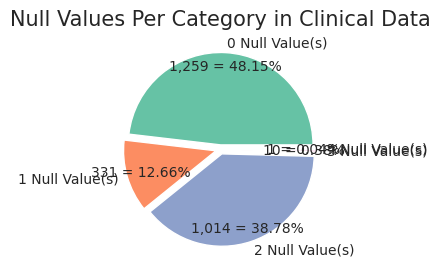

In [ ]:
plt.figure(figsize=(3, 3))

plt.pie(
    x=list(null_in_train_clinical_data.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_in_train_clinical_data.values()) / 100, x),
    explode=[0.05] * len(null_in_train_clinical_data.keys()),
    labels=null_in_train_clinical_data.keys(),
    colors=sns.color_palette("Set2")[:len(null_in_train_clinical_data.keys())],
    pctdistance=0.85,
)


plt.gca().set_title("Null Values Per Category in Clinical Data", fontsize=15)



plt.show()

In [ ]:
df2["null_count"] = df2.isnull().sum(axis=1)
counts_in_train_peptides = df2.groupby("null_count")["visit_id"].count().to_dict()
null_in_train_peptides = {"{} Null Value(s)".format(k) : v for k, v in counts_in_train_peptides.items()}

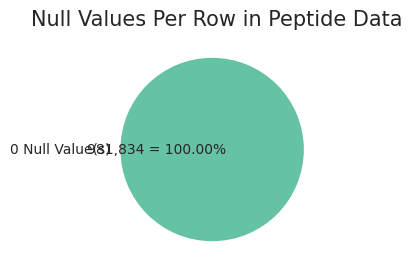

In [ ]:
plt.figure(figsize=(3, 3))

plt.pie(
    x=list(null_in_train_peptides.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_in_train_peptides.values())/100, x),
    explode=[0.05] * len(null_in_train_peptides.keys()),
    labels=null_in_train_peptides.keys(),
    colors=sns.color_palette("Set2")[0:len(null_in_train_peptides.keys())],
)


plt.gca().set_title("Null Values Per Row in Peptide Data", fontsize=15)



plt.show()

In [ ]:
df1["null_count"] = df1.isnull().sum(axis=1)
counts_in_train_protiens = df1.groupby("null_count")["visit_id"].count().to_dict()
null_in_train_protiens = {"{} Null Value(s)".format(k) : v for k, v in counts_in_train_protiens.items()}

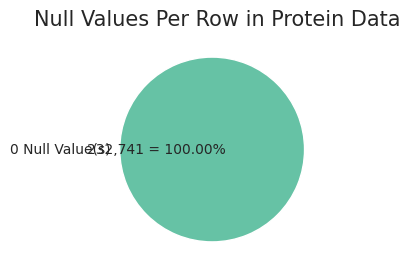

In [ ]:
plt.figure(figsize=(3, 3))

plt.pie(
    x=list(null_in_train_protiens.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_in_train_protiens.values())/100, x),
    explode=[0.05] * len(null_in_train_protiens.keys()),
    labels=null_in_train_protiens.keys(),
    colors=sns.color_palette("Set2")[0:len(null_in_train_protiens.keys())],
)


plt.gca().set_title("Null Values Per Row in Protein Data", fontsize=15)



plt.show()

In [ ]:
df3["null_count"] = df3.isnull().sum(axis=1)
counts_in_supplemental_clinical_data = df3.groupby("null_count")["visit_id"].count().to_dict()
null_in_supplemental_clinical_data = {"{} Null Value(s)".format(k) : v for k, v in counts_in_supplemental_clinical_data.items()}

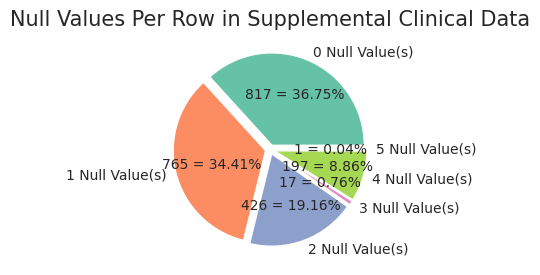

In [ ]:
plt.figure(figsize=(3, 3))

plt.pie(
    x=list(null_in_supplemental_clinical_data.values()),
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_in_supplemental_clinical_data.values())/100, x),
    explode=[0.05] * len(null_in_supplemental_clinical_data.keys()),
    labels=null_in_supplemental_clinical_data.keys(),
    colors=sns.color_palette("Set2")[0:len(null_in_supplemental_clinical_data.keys())],
)

plt.gca().set_title("Null Values Per Row in Supplemental Clinical Data", fontsize=15)



plt.show()

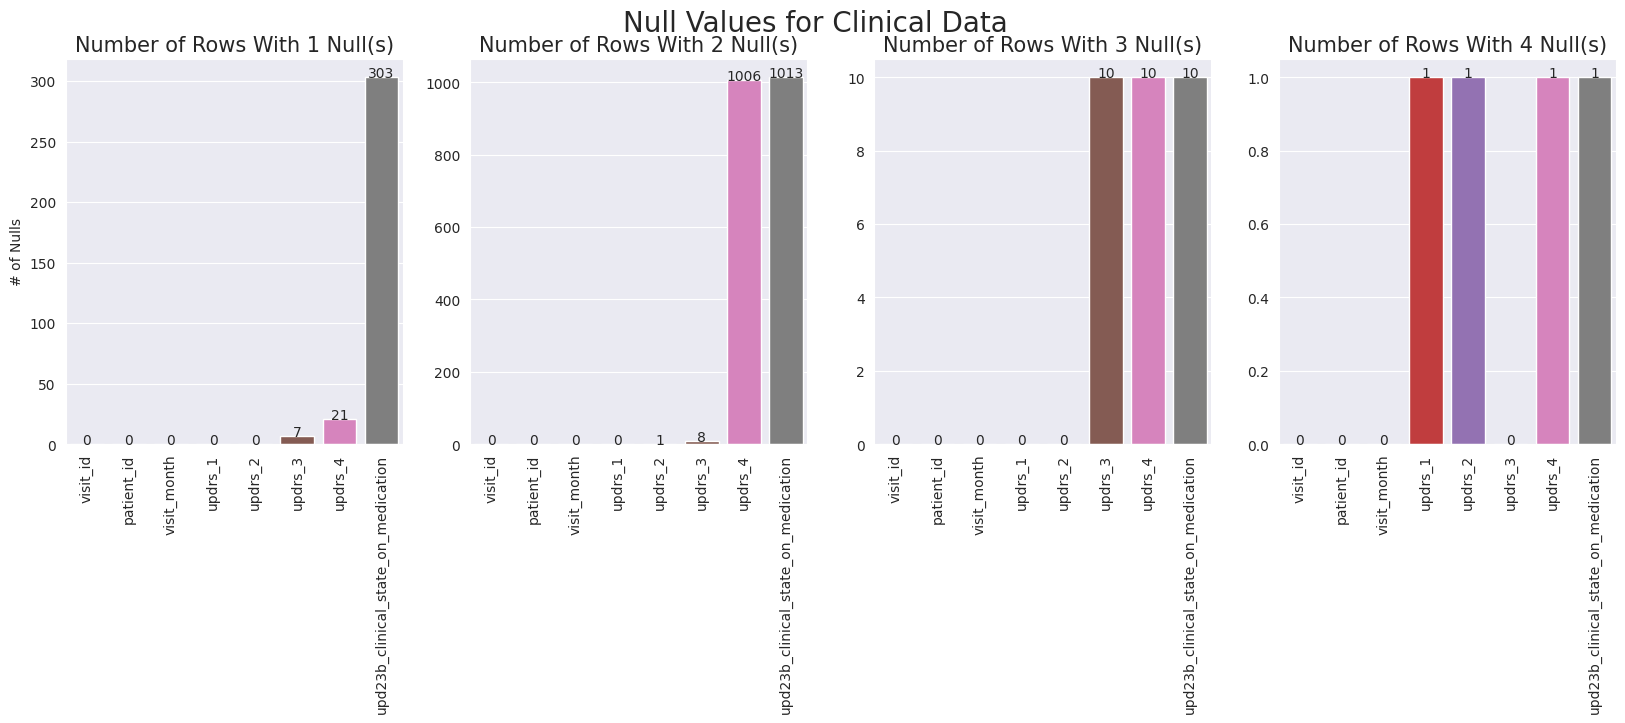

In [ ]:

null_count_in_labels = [df4[(df4["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_in_values = [df4[(df4["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Clinical Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_in_labels[x]
    _ = sns.barplot(x=labels, y=null_count_in_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

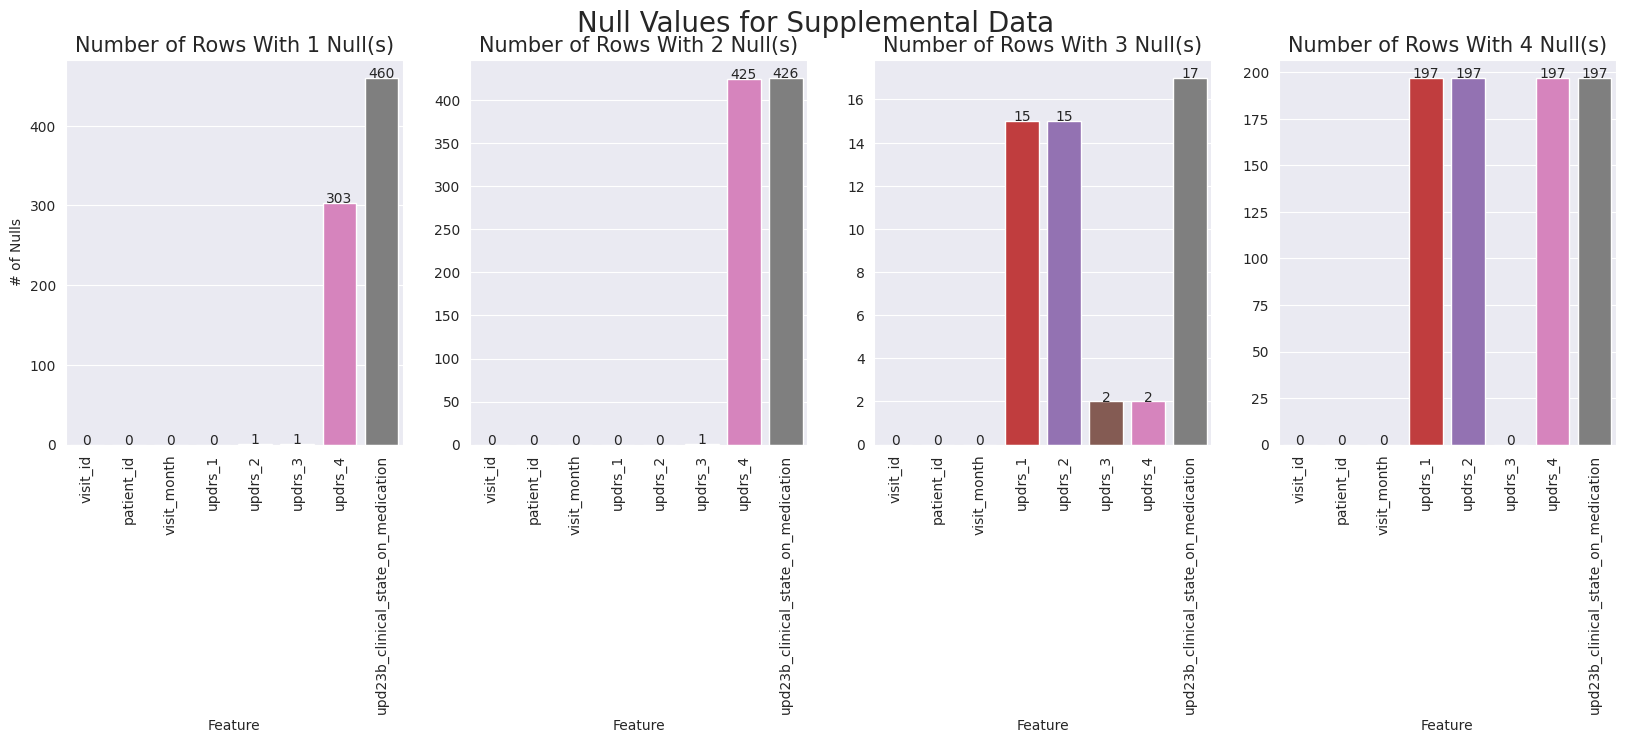

In [ ]:
null_count_in_labels = [df3[(df3["null_count"] == x)].isnull().sum().index[:-1] for x in range(1, 6)]
null_count_in_values = [df3[(df3["null_count"] == x)].isnull().sum().values[:-1] for x in range(1, 6)]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle("Null Values for Supplemental Data", fontsize=20)

axs = axs.flatten()

for x in range(0, 4):
    ax = axs[x]
    labels = null_count_in_labels[x]
    _ = sns.barplot(x=labels, y=null_count_in_values[x], ax=ax)
    _ = ax.set_title("Number of Rows With {} Null(s)".format(x + 1), fontsize=15)
    _ = ax.set_ylabel("# of Nulls" if x == 0 else "")
    _ = ax.set_xlabel("Feature")
    _ = ax.set_xticks([z for z in range(len(labels))], labels, rotation=90)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2), y=height, s="{:d}".format(int(height)), ha="center")

In [ ]:
titles = ["Peptide Data", "Protein Data", "Clinical Data", "Supplemental Data"]
value_counts = []
duplicates = df2.pivot_table(index=[
    'UniProt', 'Peptide', 'PeptideAbundance',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

In [ ]:
duplicates = df1.pivot_table(index=[
    'UniProt', 'NPX',
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

In [ ]:
duplicates = df4.pivot_table(index=[
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'
], aggfunc="size")
unique, counts = np.unique(duplicates, return_counts=True)
value_counts.append(dict(zip(unique, counts)))

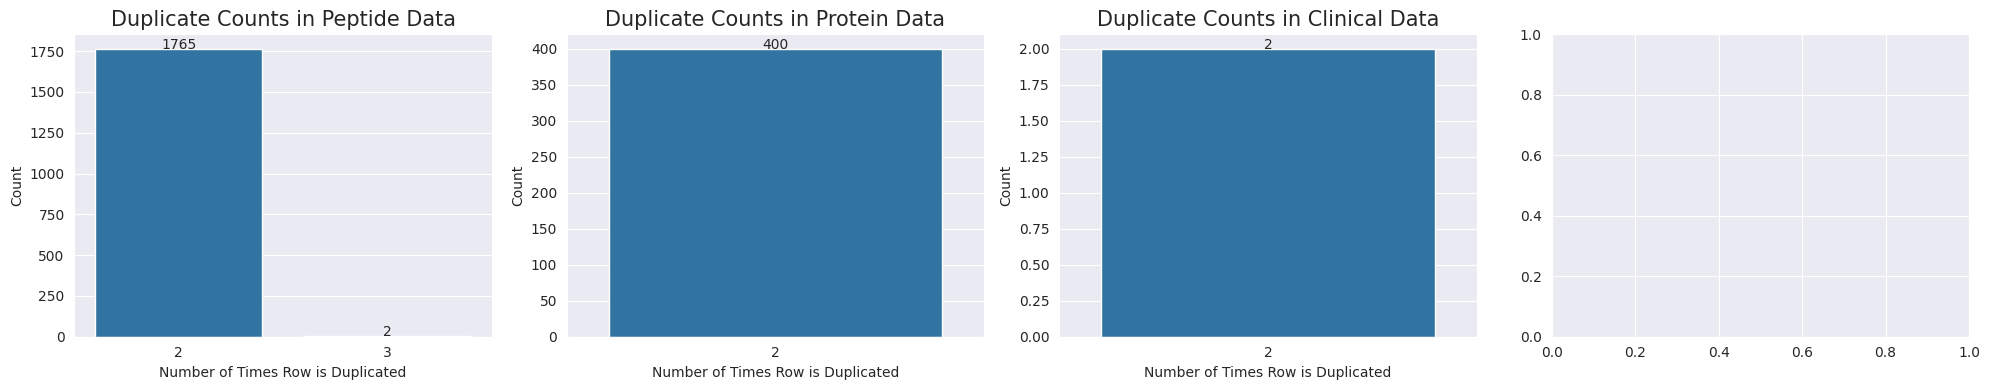

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))

for ax, counts, title in zip(axs, value_counts, titles):
    sns.barplot(x=list(counts.keys())[1:], y=list(counts.values())[1:], ax=ax)
    ax.set_title(f"Duplicate Counts in {title}", fontsize=15)
    ax.set_ylabel("Count")
    ax.set_xlabel("Number of Times Row is Duplicated")

    for p in ax.patches:
        height = p.get_height()
        ax.text(x=p.get_x() + (p.get_width() / 2), y=height, s="{:d}".format(int(height)), ha="center")

plt.tight_layout()
plt.show()

In [ ]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

df4[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

In [ ]:
features = [
    'visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4',
]

df3[features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

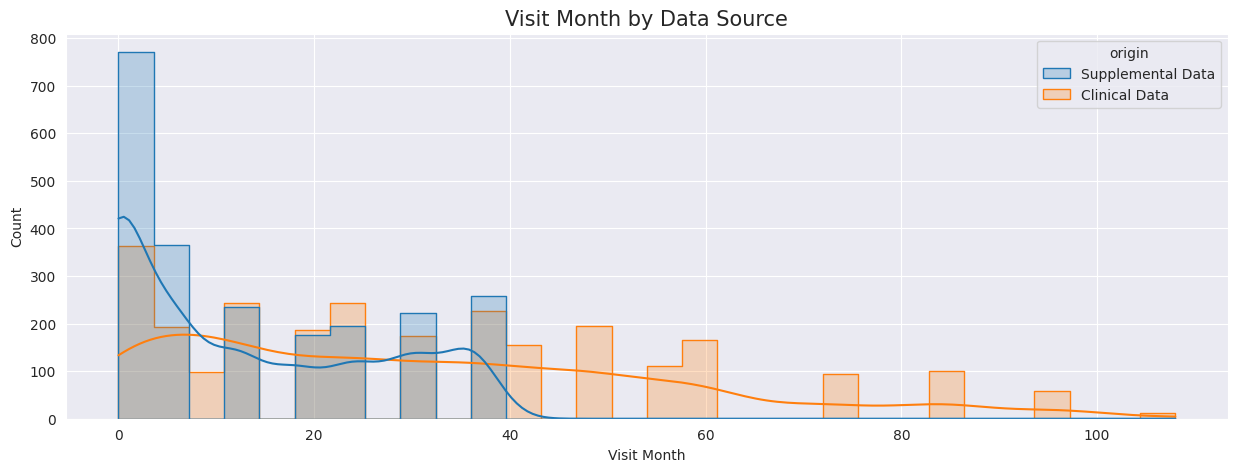

In [ ]:
df4["origin"] = "Clinical Data"
df3["origin"] = "Supplemental Data"

merged_df1 = pd.concat([df3, df4], ignore_index=True)

plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')

ax = sns.histplot(data=merged_df1, x="visit_month", hue="origin", kde=True, element="step")

ax.set_title("Visit Month by Data Source", fontsize=15)
ax.set_ylabel("Count")
ax.set_xlabel("Visit Month")

plt.show()


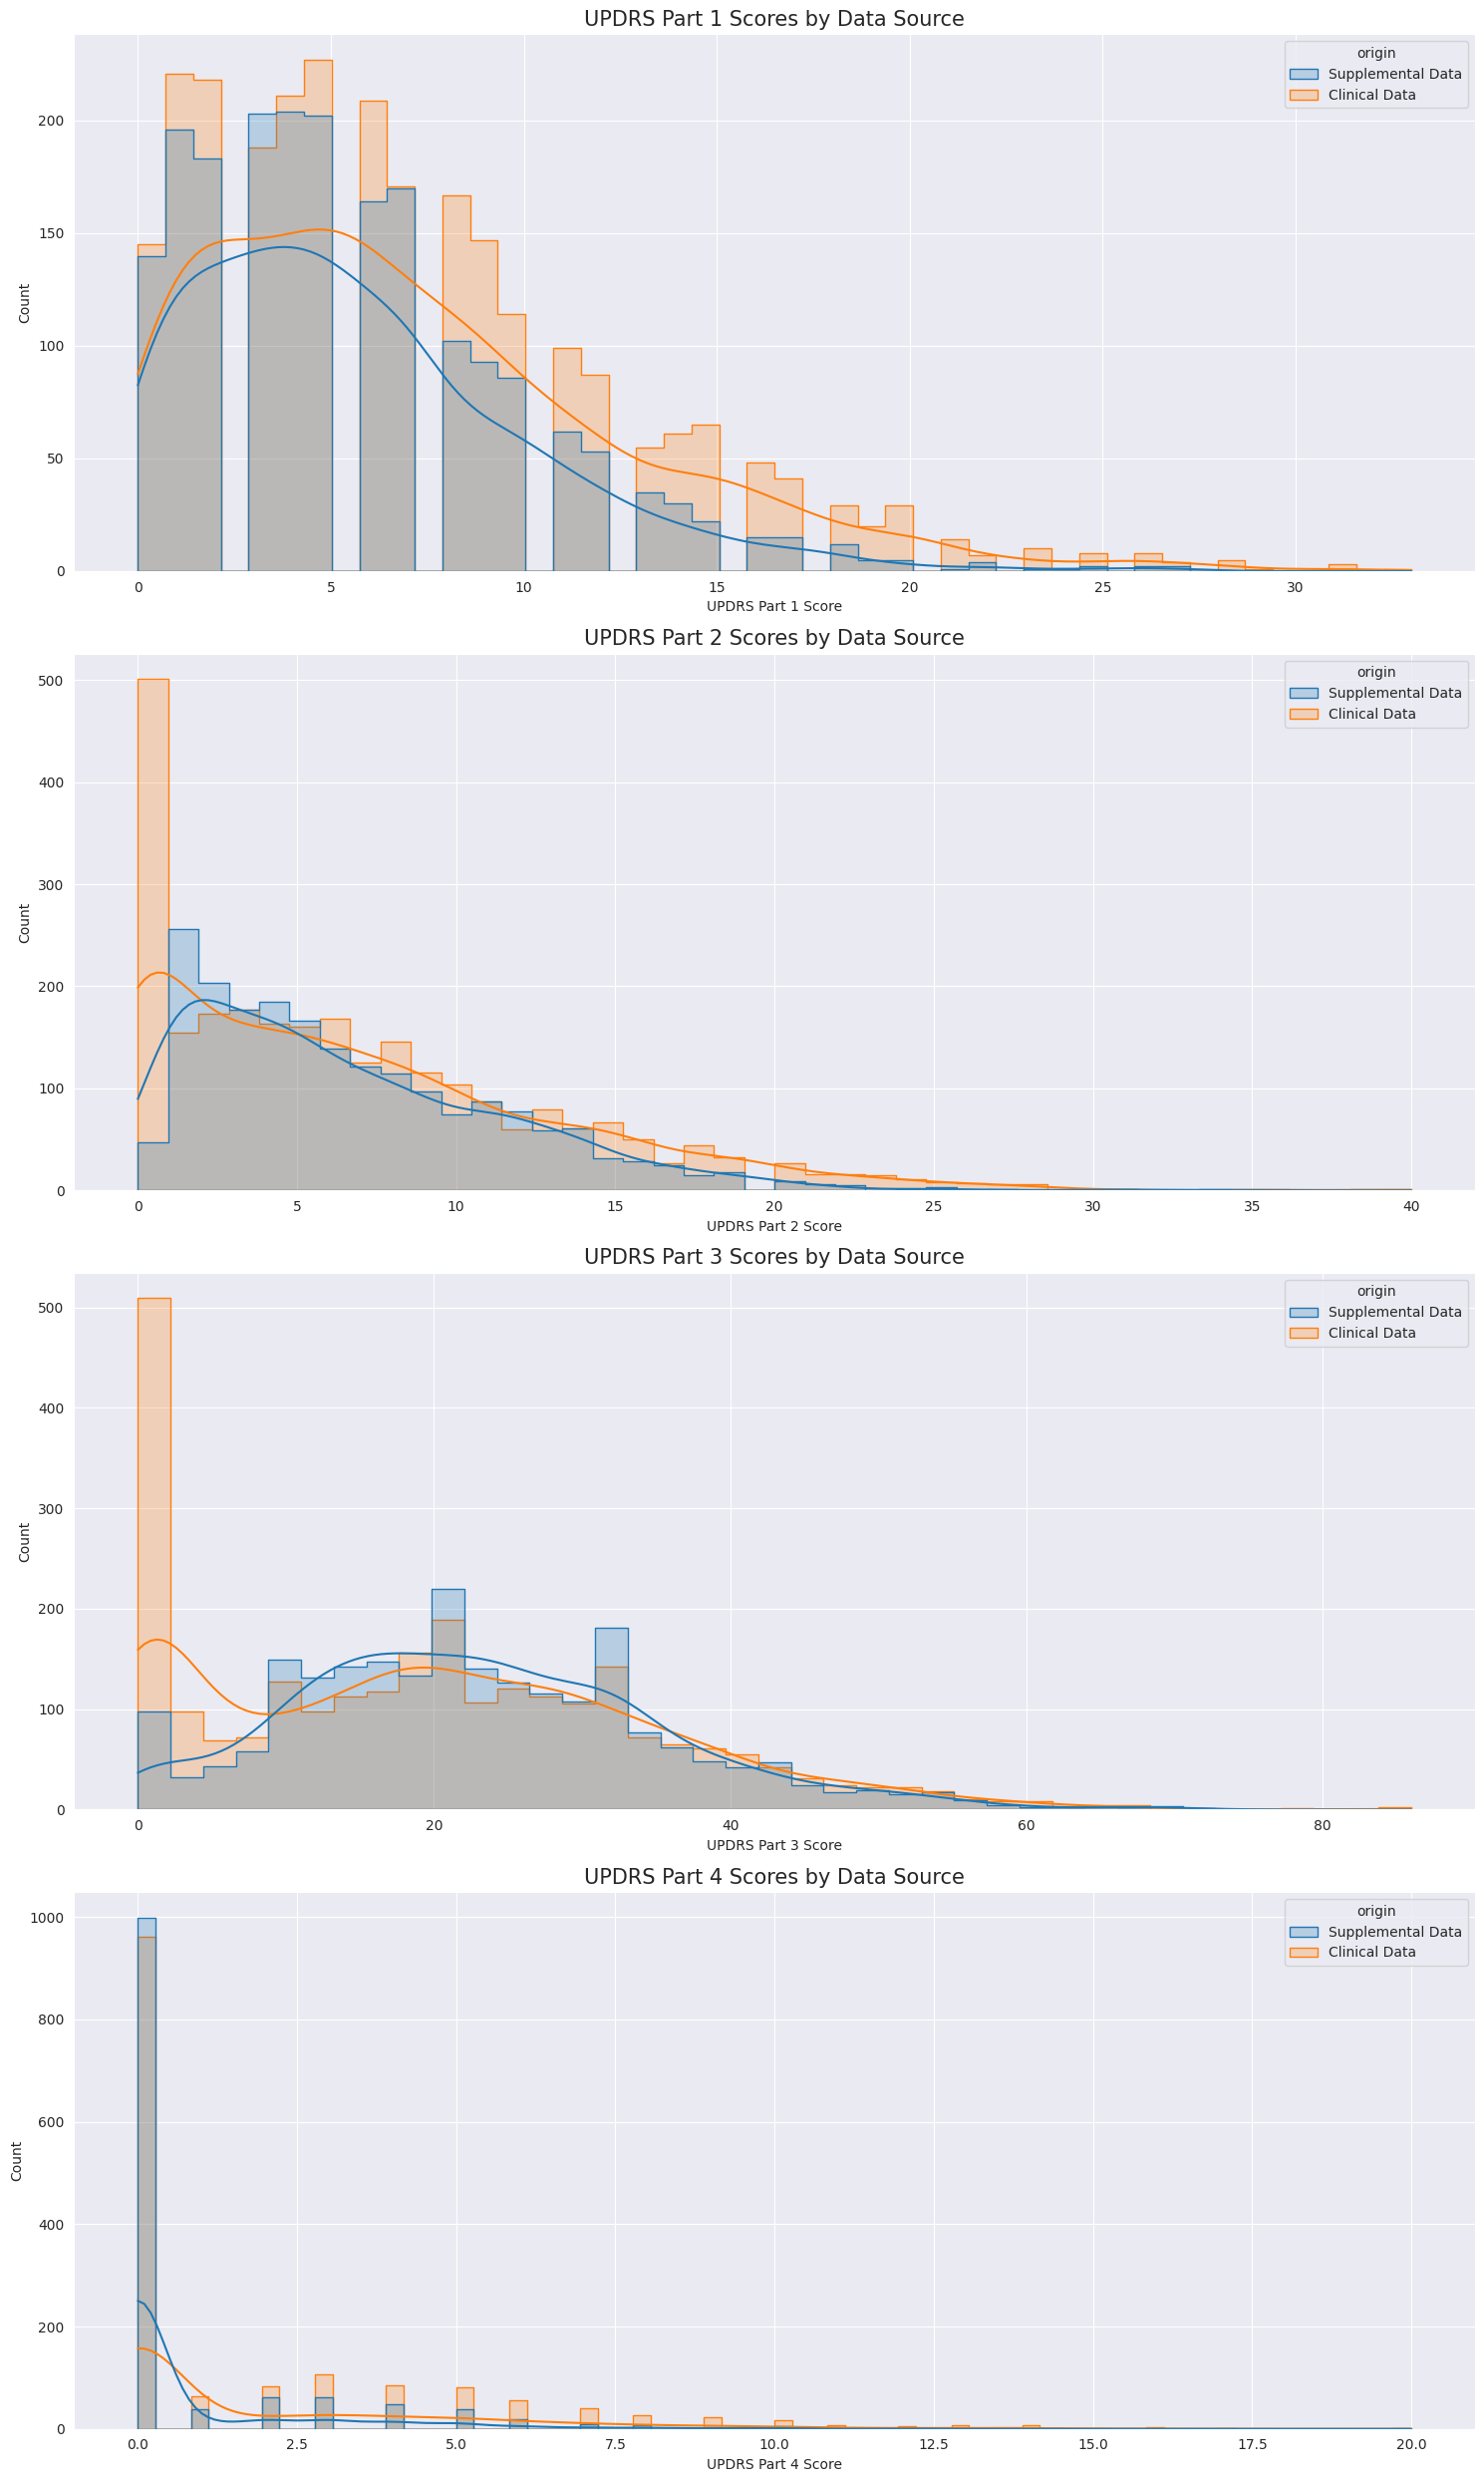

In [ ]:
features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
labels = ["UPDRS Part 1", "UPDRS Part 2", "UPDRS Part 3", "UPDRS Part 4"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
sns.set_style('darkgrid')

for ax, feature, label in zip(axs.flatten(), features, labels):
    sns.histplot(data=merged_df1, x=feature, hue="origin", kde=True, ax=ax, element="step")
    ax.set_title("{} Scores by Data Source".format(label), fontsize=15)
    ax.set_ylabel("Count")
    ax.set_xlabel("{} Score".format(label))

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

In [ ]:
encode = LabelEncoder()

In [ ]:
merged_df1['origin'].unique()

array(['Supplemental Data', 'Clinical Data'], dtype=object)

In [ ]:
merged_df1['origin'] = encode.fit_transform(merged_df1['origin'])

In [ ]:
merged_df1['origin'].unique()

array([1, 0])

In [ ]:
merged_df1['upd23b_clinical_state_on_medication'] = encode.fit_transform(merged_df1['upd23b_clinical_state_on_medication'])

In [ ]:
merged_df1['upd23b_clinical_state_on_medication'].unique()

array([2, 1, 0])

In [ ]:
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_pred = np.zeros((merged_df1.shape[0],))
train_prob = np.zeros((merged_df1.shape[0],))

In [ ]:
for fold, (train, test) in enumerate(skf.split(merged_df1)):
    print(f"-------> Fold {fold + 1} <--------")

    x_train, x_valid = merged_df1.iloc[train], merged_df1.iloc[test]
    y_train, y_valid = x_train["origin"], x_valid["origin"]

    x_train_features = x_train[features]
    x_valid_features = x_valid[features]


    model = LGBMClassifier(
        random_state=2023,
        objective="binary",
        metric="auc",
        n_jobs=-1,
        n_estimators=2000,
        verbose=-1,
        max_depth=3,
    )
    model.fit(
        x_train_features[features],
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        callbacks=[
            early_stopping(50, verbose=False),
            log_evaluation(2000),
        ]
    )


    pred = model.predict(x_valid_features)
    prob = model.predict_proba(x_valid_features)[:, 1]


    train_pred[test] = pred
    train_prob[test] = prob


    auc_fold = roc_auc_score(y_valid, prob)
    print(f" AUC ROC = {auc_fold}")


-------> Fold 1 <--------
 AUC ROC = 0.7558050803614542
-------> Fold 2 <--------
 AUC ROC = 0.7512799755415944
-------> Fold 3 <--------
 AUC ROC = 0.762936472736198
-------> Fold 4 <--------
 AUC ROC = 0.7880860043832614
-------> Fold 5 <--------
 AUC ROC = 0.7595920622178488


In [ ]:
# Calculating AUC ROC for the entire dataset
auc = roc_auc_score(merged_df1["origin"], train_prob)
print("--> Overall results for out of fold predictions")
print(f": AUC ROC = {auc}")

--> Overall results for out of fold predictions
: AUC ROC = 0.7619457281729597


In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(merged_df1["origin"], train_pred)
cm

array([[1730,  885],
       [ 642, 1581]])

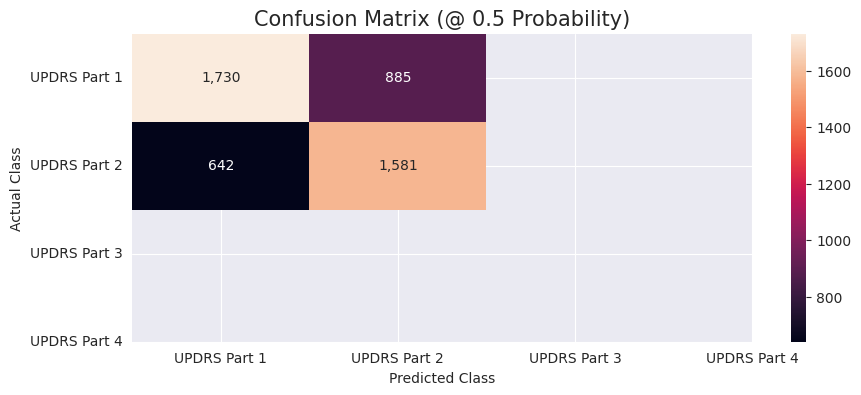

In [ ]:
plt.figure(figsize=(10, 4))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt=",d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (@ 0.5 Probability)", fontsize=15)
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")



plt.show()

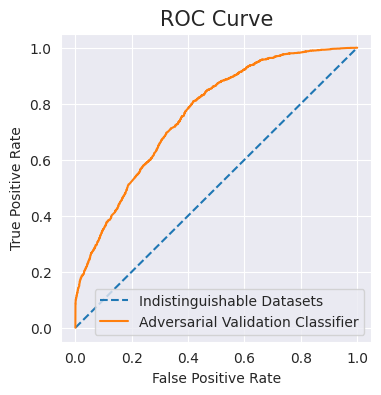

In [ ]:
plt.figure(figsize=(4, 4))

# Plot ROC curve
fpr, tpr, _ = roc_curve(merged_df1["origin"], train_prob)
plt.plot([0, 1], [0, 1], linestyle="--", label="Indistinguishable Datasets")
plt.plot(fpr, tpr, label="Adversarial Validation Classifier")
plt.title("ROC Curve", fontsize=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

In [ ]:
df1[["NPX"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

<ipython-input-127-990e786fad72>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ = sns.kdeplot(df1["NPX"], shade=True, color="r", ax=ax, label="Normalized Protein Expression", log_scale=True)


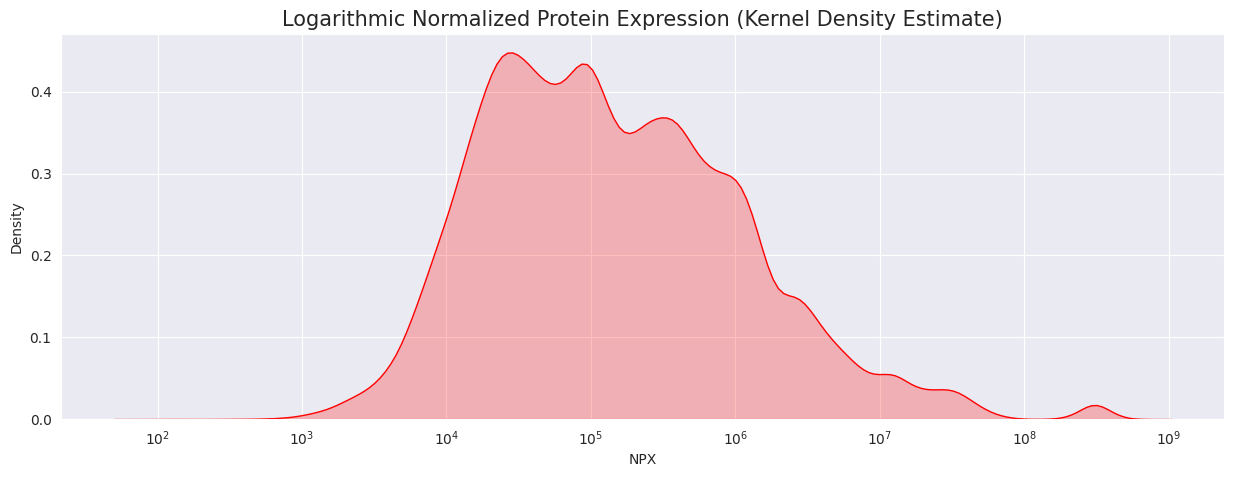

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(df1["NPX"], shade=True, color="r", ax=ax, label="Normalized Protein Expression", log_scale=True)
_ = ax.set_title("Logarithmic Normalized Protein Expression (Kernel Density Estimate)", fontsize=15)

In [ ]:
df2[["PeptideAbundance"]].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

<ipython-input-129-32e0f8437d93>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  _ = sns.kdeplot(df2["PeptideAbundance"], shade=True, color="r", ax=ax, label="Peptide Abundance", log_scale=True)


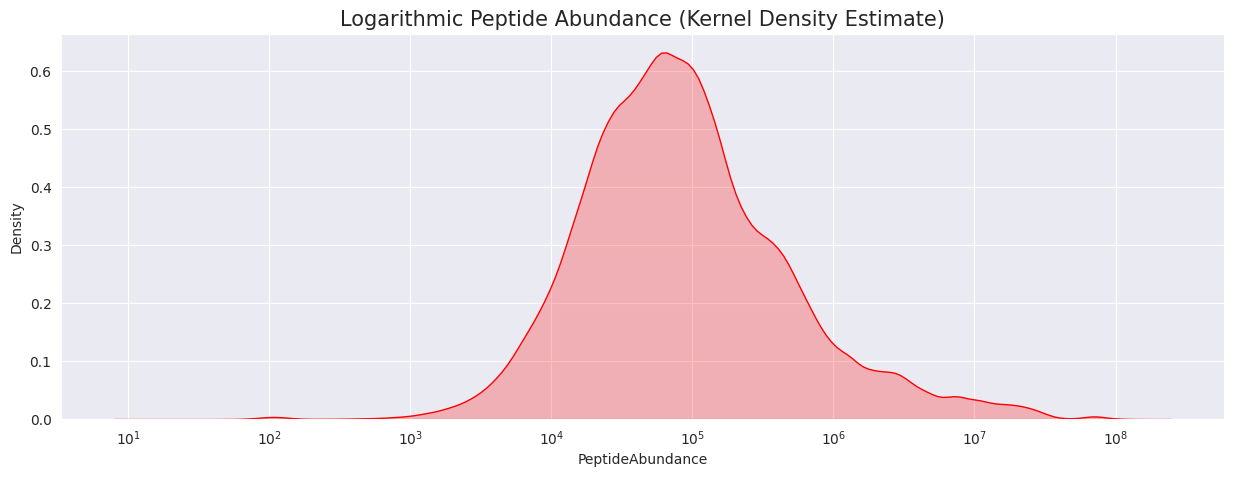

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.set_style('darkgrid')

_ = sns.kdeplot(df2["PeptideAbundance"], shade=True, color="r", ax=ax, label="Peptide Abundance", log_scale=True)
_ = ax.set_title("Logarithmic Peptide Abundance (Kernel Density Estimate)", fontsize=15)

In [ ]:
df4_c = df4.copy()
df4_c["upd23b_clinical_state_on_medication"] = df4_c["upd23b_clinical_state_on_medication"].fillna("Off")

<ipython-input-131-5f6d378884c0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-131-5f6d378884c0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-131-5f6d378884c0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-131-5f6d378884c0>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)


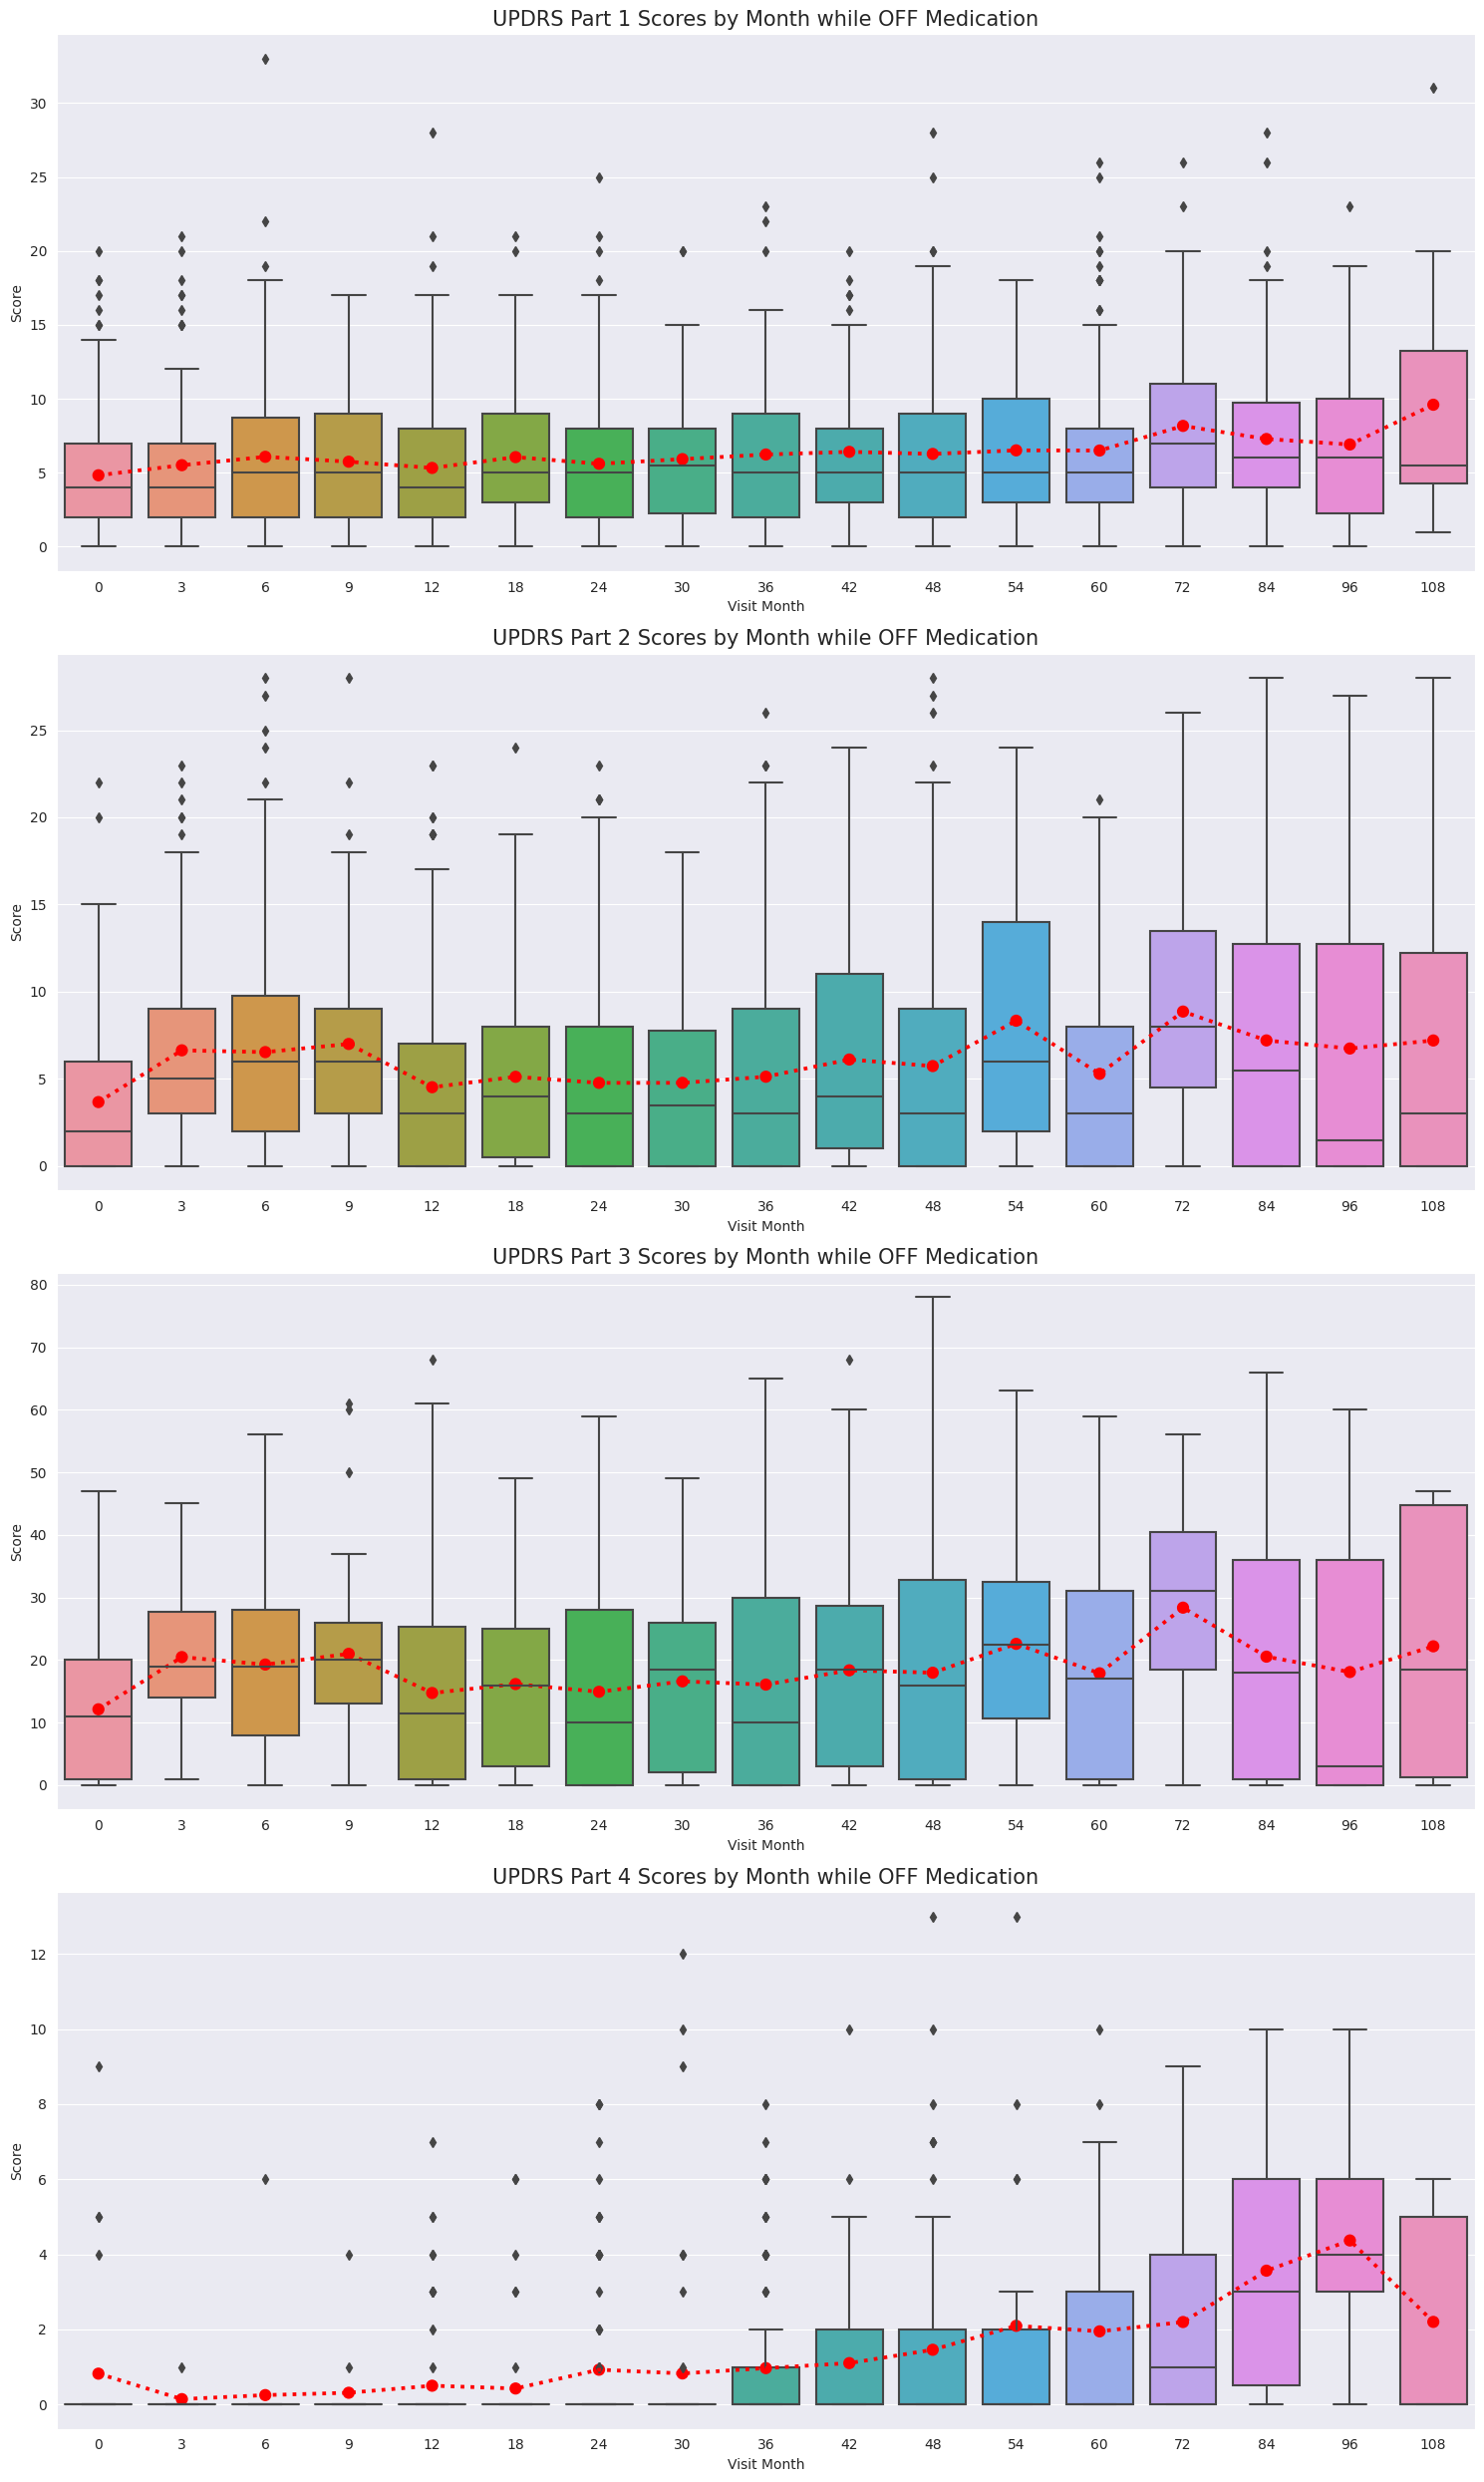

In [ ]:
features = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
data = df4_c[df4_c["upd23b_clinical_state_on_medication"] == "Off"]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
sns.set_style('darkgrid')

for x, feature in enumerate(features):
    ax = axs[x]
    sns.boxplot(data=data, x="visit_month", y=feature, ax=ax)
    sns.pointplot(data=data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
    ax.set_title("UPDRS Part {} Scores by Month while OFF Medication".format(x + 1), fontsize=15)
    ax.set_xlabel("Visit Month")
    ax.set_ylabel("Score")

plt.tight_layout()
plt.show()

<ipython-input-132-63381b3800d6>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=condition_data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-132-63381b3800d6>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=condition_data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-132-63381b3800d6>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=condition_data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-132-63381b3800d6>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=condition_data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)


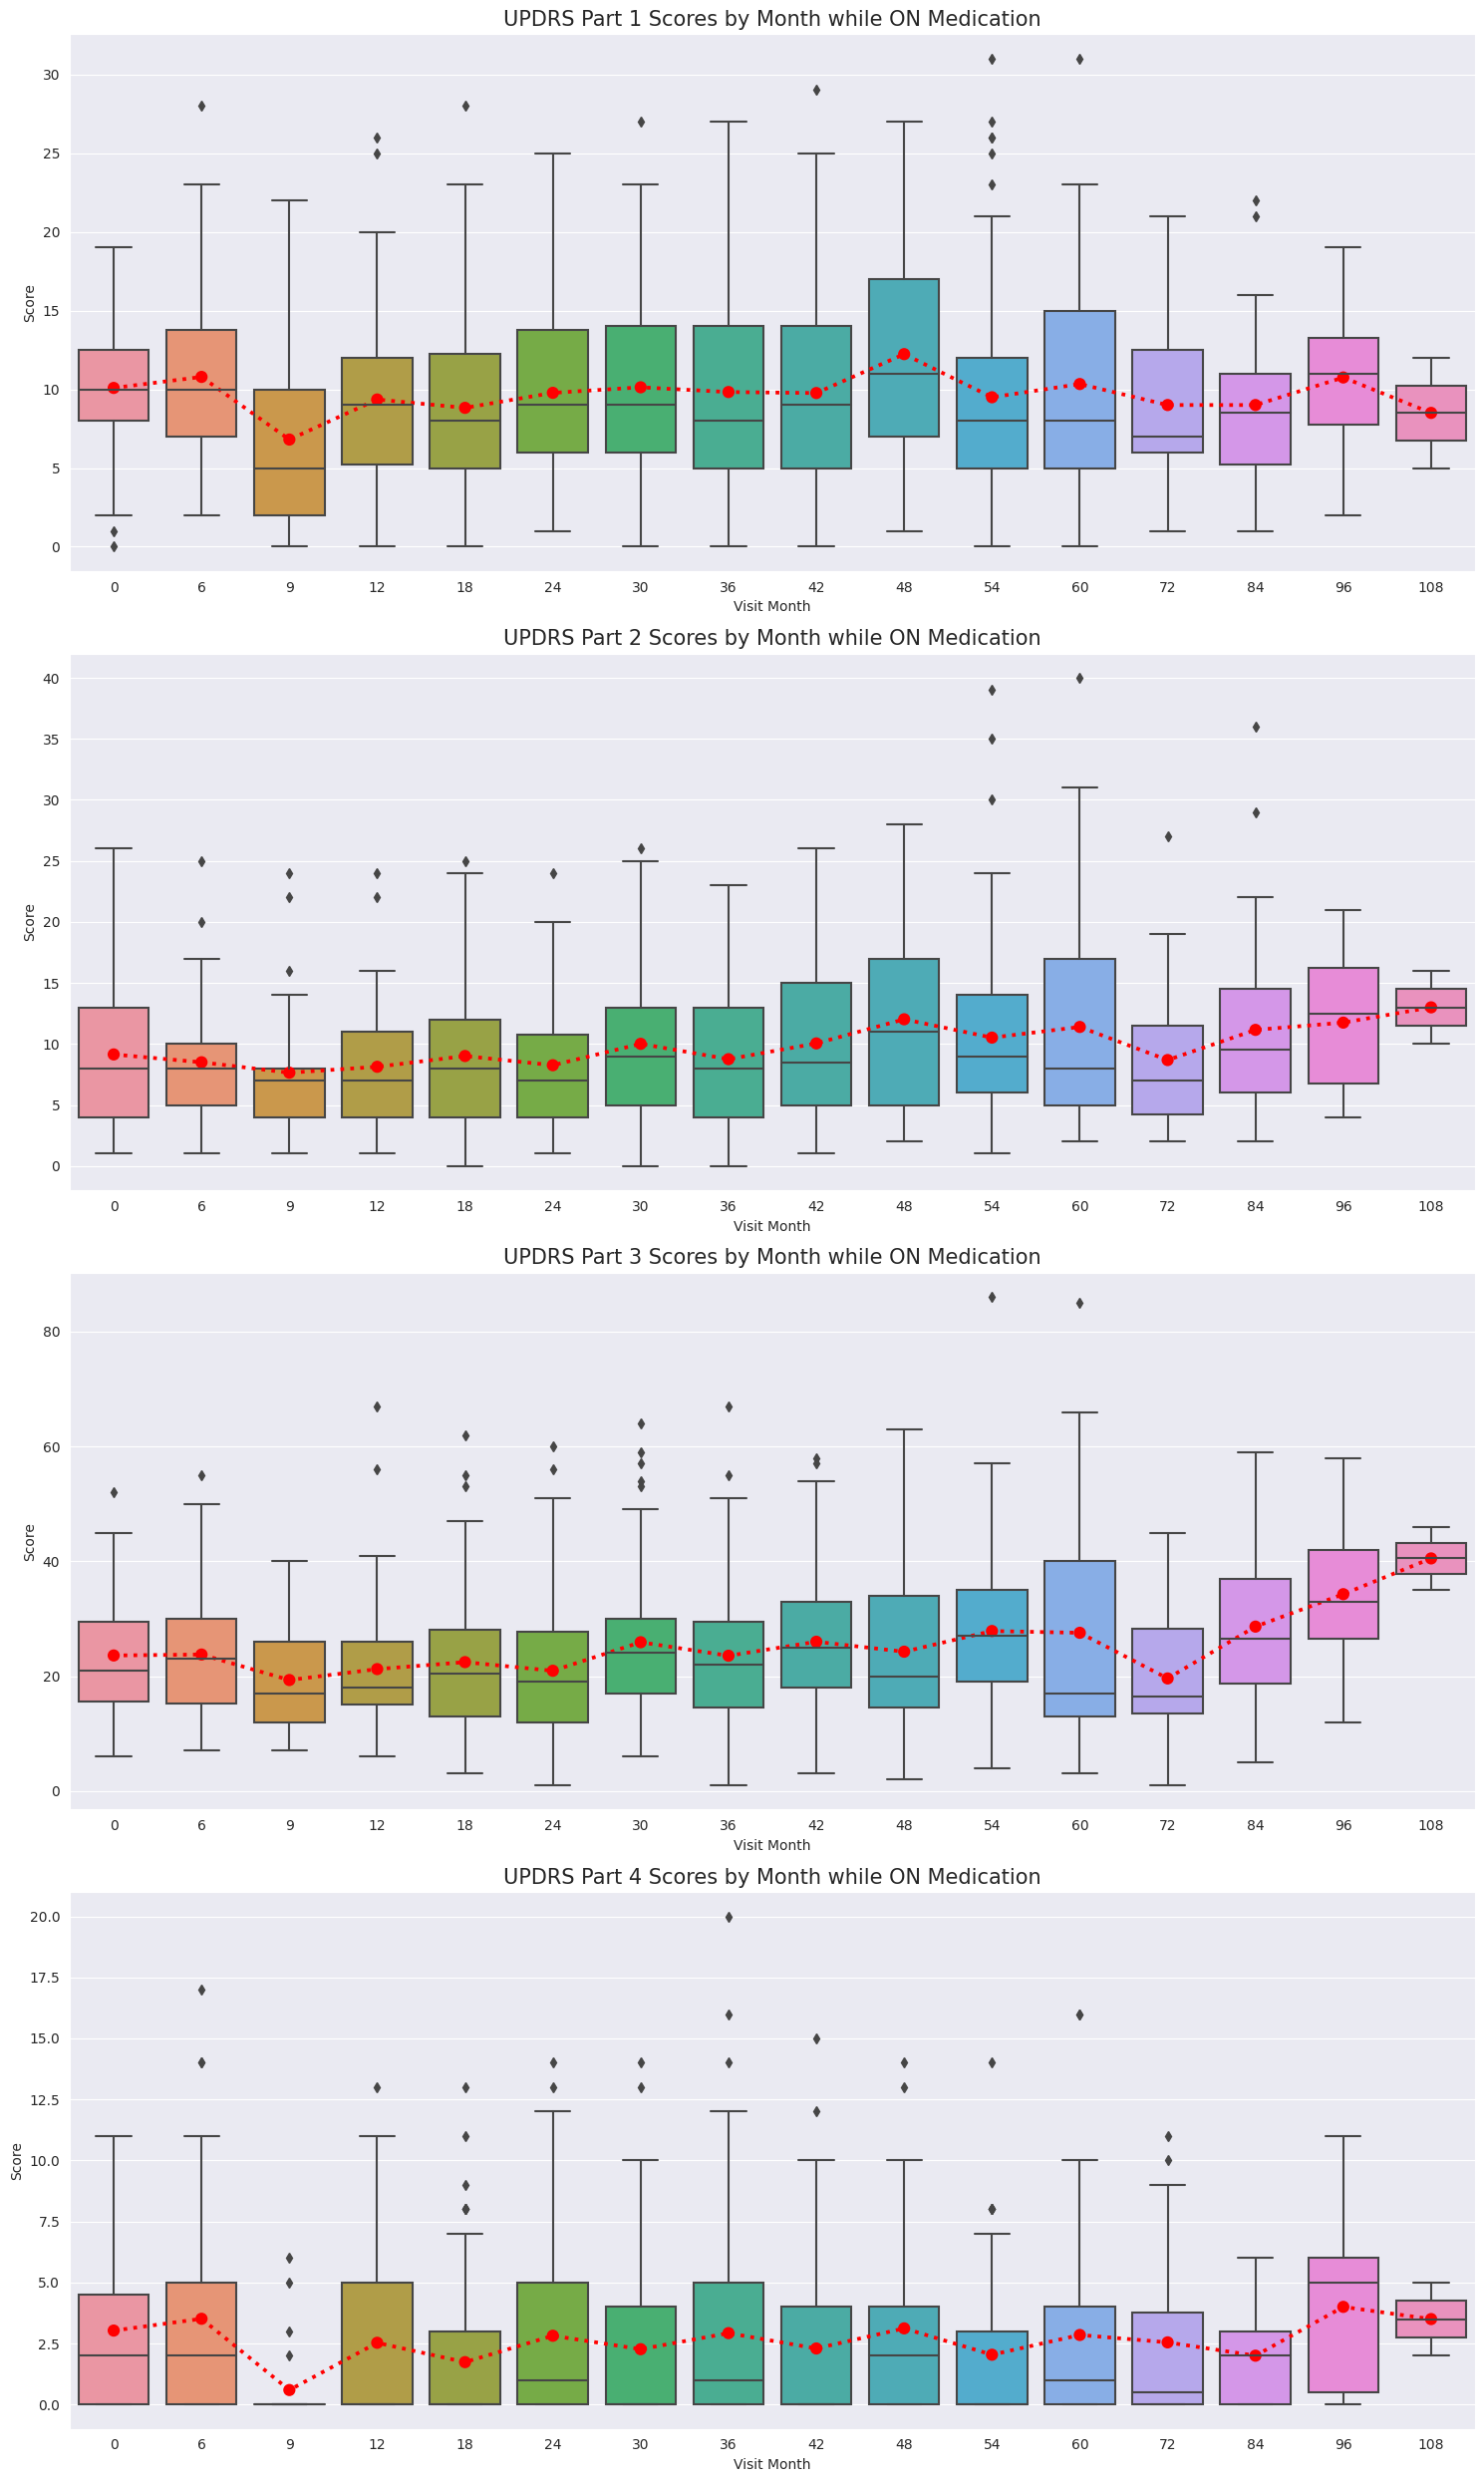

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))

sns.set_style('darkgrid')

axs = axs.flatten()


for x, feature in enumerate(features):
    ax = axs[x]
    condition_data = df4_c[df4_c["upd23b_clinical_state_on_medication"] == "On"]

    sns.boxplot(data=condition_data, x="visit_month", y=feature, ax=ax)
    sns.pointplot(data=condition_data, x="visit_month", y=feature, color="r", ci=None, linestyles=[":"], ax=ax)

    ax.set_title("UPDRS Part {} Scores by Month while ON Medication".format(x + 1), fontsize=15)
    ax.set_xlabel("Visit Month")
    ax.set_ylabel("Score")

plt.tight_layout()
plt.show()

In [ ]:
df4["updrs_sum"] = df4["updrs_1"] + df4["updrs_2"] + df4["updrs_3"] + df4["updrs_4"]
df4_c = df4.copy()
df4_c["upd23b_clinical_state_on_medication"] = df4_c["upd23b_clinical_state_on_medication"].fillna("Off")

<ipython-input-134-226aea222288>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=condition_data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)
<ipython-input-134-226aea222288>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=condition_data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)


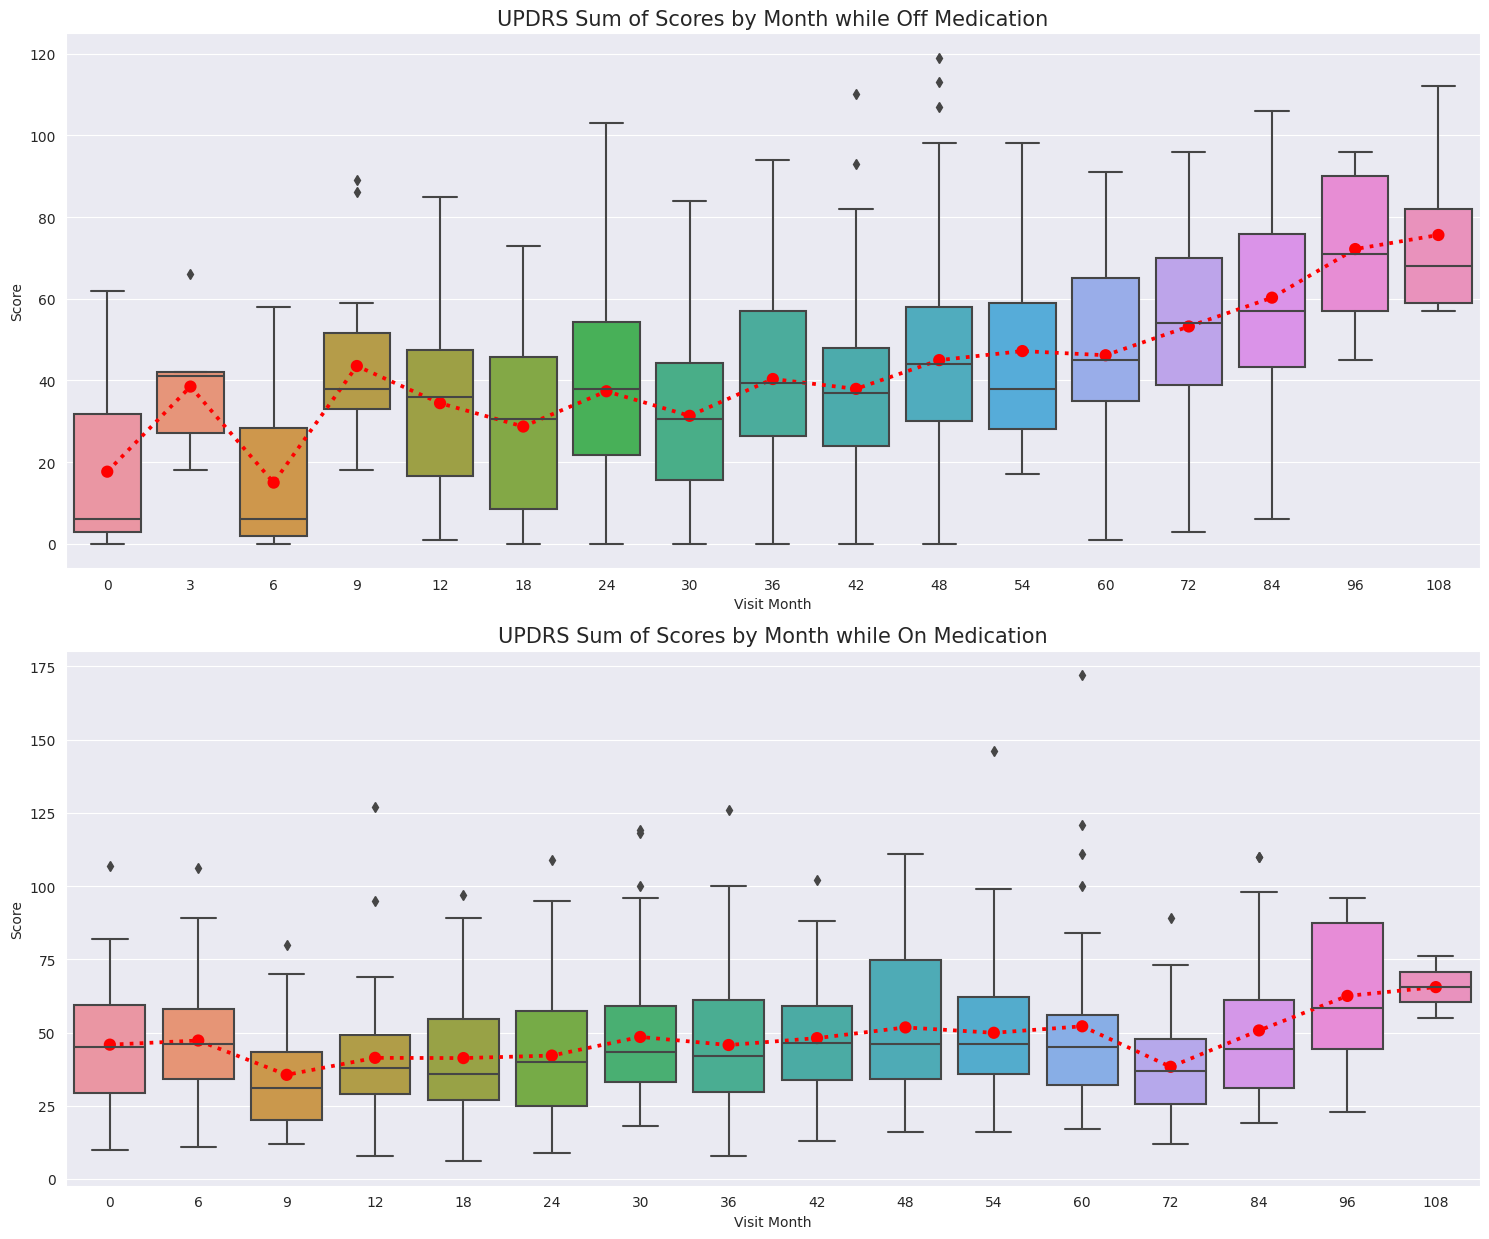

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 12.5))
sns.set_style('darkgrid')

conditions = ["Off", "On"]

for i, condition in enumerate(conditions):
    ax = axs[i]
    condition_data = df4_c[df4_c["upd23b_clinical_state_on_medication"] == condition]

    sns.boxplot(data=condition_data, x="visit_month", y="updrs_sum", ax=ax)
    sns.pointplot(data=condition_data, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)

    ax.set_title("UPDRS Sum of Scores by Month while {} Medication".format(condition), fontsize=15)
    ax.set_xlabel("Visit Month")
    ax.set_ylabel("Score")

plt.tight_layout()
plt.show()

<ipython-input-135-895189af75c3>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df4_c, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)


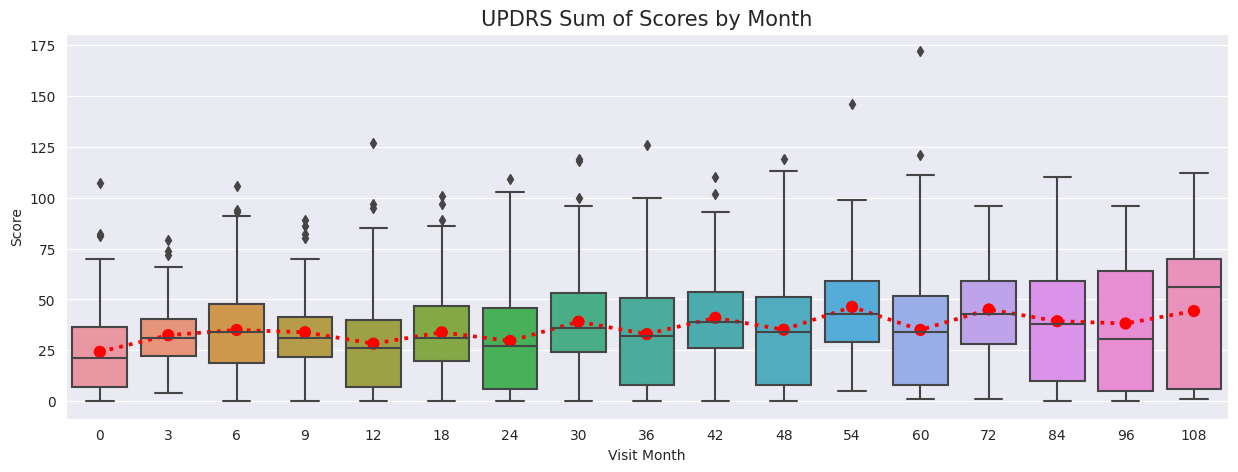

In [ ]:

df4["updrs_sum"] = df4[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].sum(axis=1)
df4_c = df4.copy()

df4_c["upd23b_clinical_state_on_medication"].fillna("Off", inplace=True)


plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')


ax = sns.boxplot(data=df4_c, x="visit_month", y="updrs_sum")
sns.pointplot(data=df4_c, x="visit_month", y="updrs_sum", color="r", ci=None, linestyles=[":"], ax=ax)


ax.set_title("UPDRS Sum of Scores by Month", fontsize=15)
ax.set_xlabel("Visit Month")
ax.set_ylabel("Score")

plt.show()

<ipython-input-136-df79cabcc67e>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df1_c, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)


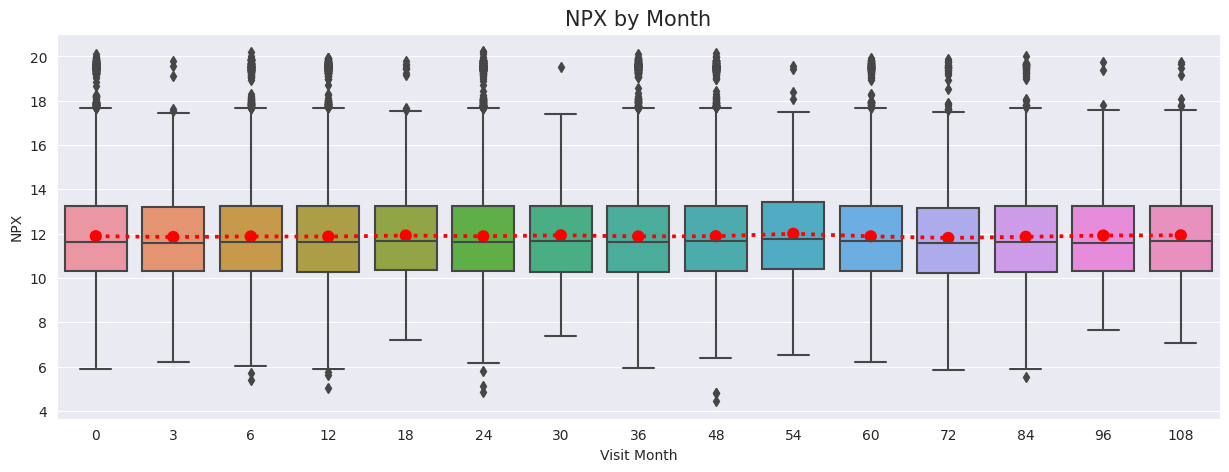

In [ ]:

df1_c = df1.copy()


df1_c["log_NPX"] = np.log(df1_c["NPX"])

plt.figure(figsize=(15, 5))
sns.set_style('darkgrid')


ax = sns.boxplot(data=df1_c, x="visit_month", y="log_NPX")
sns.pointplot(data=df1_c, x="visit_month", y="log_NPX", color="r", ci=None, linestyles=[":"], ax=ax)

ax.set_title("NPX by Month", fontsize=15)
ax.set_xlabel("Visit Month")
ax.set_ylabel("NPX")

plt.show()

In [ ]:
unique_proteins = df1["UniProt"].unique()
unique_months = df1["visit_month"].unique()
unique_proteins,unique_months

(array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
        'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
        'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
        'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
        'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
        'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
        'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
        'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
        'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
        'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
        'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
        'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
        'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
        'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
        'P05155', 'P05156', 'P05408', 'P05452', 

In [ ]:
protein_dict = {}

for protein in unique_proteins:
    protein_data = df1[df1["UniProt"] == protein]

    count_NPX = []
    total_NPX = []
    avg_NPX = []

    for month in unique_months:
        month_data = protein_data[protein_data["visit_month"] == month]
        count = month_data["NPX"].count()
        total = month_data["NPX"].sum()
        avg = total / count if count > 0 else 0

        count_NPX.append(count)
        total_NPX.append(total)
        avg_NPX.append(avg)


    mean = np.mean(avg_NPX)
    std = np.std(avg_NPX, ddof=1)


    protein_dict[protein] = {
        "months": unique_months,
        "count_NPX": count_NPX,
        "total_NPX": total_NPX,
        "avg_NPX": avg_NPX,
        "min_NPX": min(avg_NPX),
        "max_NPX": max(avg_NPX),
        "mean": mean,
        "std": std,
    }


proteins_with_large_std = [protein for protein in unique_proteins if protein_dict[protein]["std"] > (protein_dict[protein]["mean"] * 0.25)]
proteins_with_large_std

['O00533',
 'O75326',
 'O94919',
 'P00441',
 'P00738',
 'P01591',
 'P01608',
 'P01780',
 'P01859',
 'P01860',
 'P01861',
 'P02655',
 'P02766',
 'P07998',
 'P08123',
 'P08294',
 'P16152',
 'P17936',
 'P23083',
 'P30086',
 'P61769',
 'P98160',
 'Q02818',
 'Q13332',
 'Q6UX71',
 'Q6UXD5',
 'Q8N2S1',
 'Q96BZ4',
 'Q96S96',
 'Q99969',
 'Q9NQ79',
 'Q9UNU6',
 'Q9Y6R7',
 'P01594',
 'P60174',
 'Q99829']

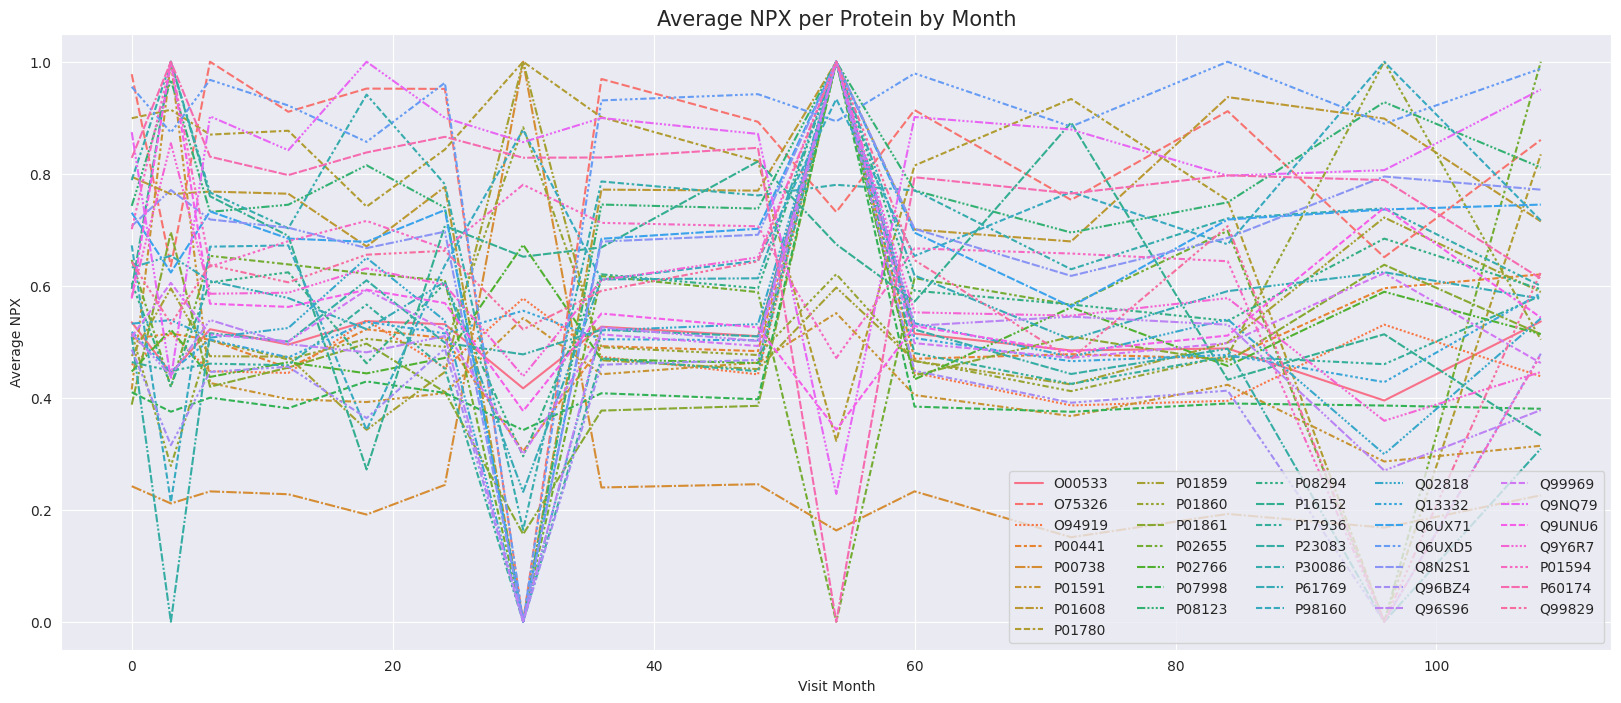

In [ ]:
proteins_of_interest_by_month = {
    "UniProt": [],
    "Visit Month": [],
    "Average NPX": [],
}

for protein in proteins_with_large_std:
    for month_index, month in enumerate(unique_months):
        value = protein_dict[protein]["avg_NPX"][month_index] / protein_dict[protein]["max_NPX"]
        proteins_of_interest_by_month["UniProt"].append(protein)
        proteins_of_interest_by_month["Visit Month"].append(month)
        proteins_of_interest_by_month["Average NPX"].append(value)

df = pd.DataFrame(proteins_of_interest_by_month)


plt.figure(figsize=(20, 8))
sns.set_style('darkgrid')


ax = sns.lineplot(data=df, x="Visit Month", y="Average NPX", hue="UniProt", style="UniProt")
ax.set_title("Average NPX per Protein by Month", fontsize=15)
ax.set_xlabel("Visit Month")
ax.set_ylabel("Average NPX")
plt.legend(ncol=5)

plt.show()

In [ ]:

protein_dict = {}
proteins = set()


for index, row in df1.iterrows():
    protein = row["UniProt"]
    if protein not in proteins:
        proteins.add(protein)
    if protein not in protein_dict:
        protein_dict[protein] = {}
    protein_dict[protein][row["visit_id"]] = row["NPX"]

In [ ]:
peptide_dict = {}
peptides = set()

for index, row in df2.iterrows():
    peptide = row["Peptide"]
    if peptide not in peptides:
        peptides.add(peptide)
    if peptide not in peptide_dict:
        peptide_dict[peptide] = {}
    peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]


In [ ]:
train_copy = df4.copy()


for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].map(lambda visit_id: protein_dict[protein].get(visit_id, 0))


for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].map(lambda visit_id: peptide_dict[peptide].get(visit_id, 0))

<ipython-input-142-be7382ef22b2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_copy[protein] = train_copy["visit_id"].map(lambda visit_id: protein_dict[protein].get(visit_id, 0))
<ipython-input-142-be7382ef22b2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_copy[protein] = train_copy["visit_id"].map(lambda visit_id: protein_dict[protein].get(visit_id, 0))
<ipython-input-142-be7382ef22b2>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

In [ ]:
features = list(proteins) + ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
train_copy[features] = train_copy[features].replace(0.0, np.nan)
correlation_matrix = train_copy[features].corr(method="spearman")

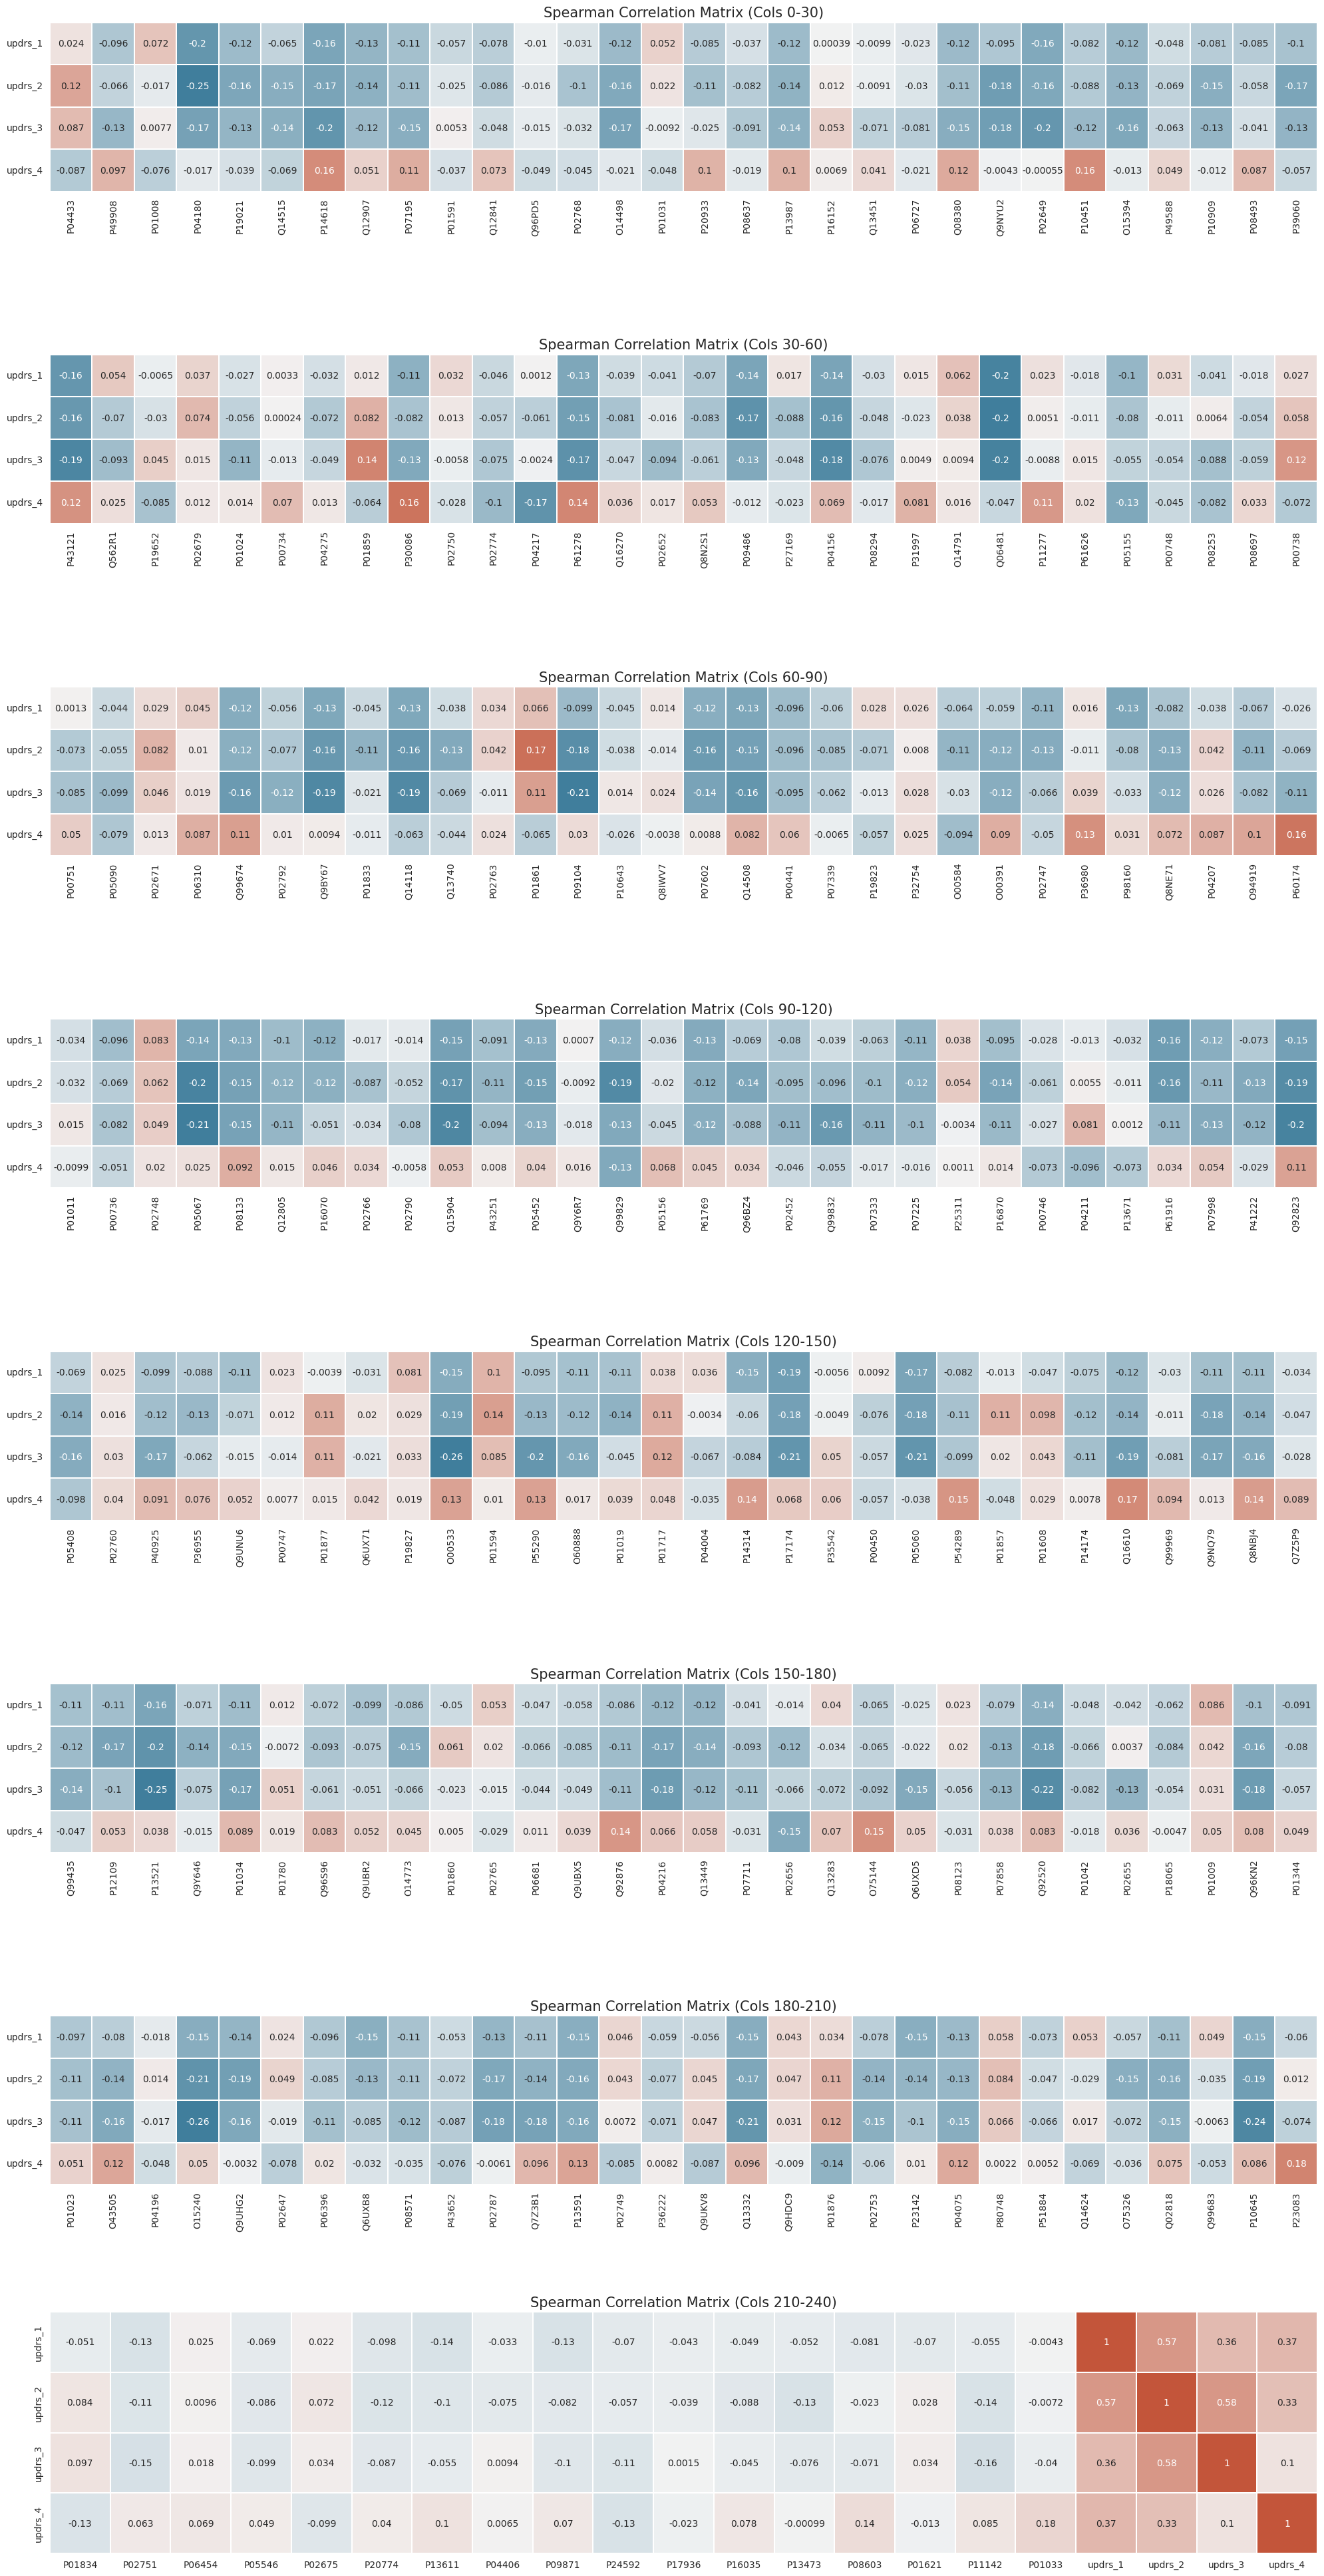

In [ ]:
fig, axs = plt.subplots(nrows=8, ncols=1, figsize=(20, 40))
axs = axs.flatten()

num_cols_per_heatmap = 30

for i in range(8):
    start_col = i * num_cols_per_heatmap
    end_col = (i + 1) * num_cols_per_heatmap

    sns.heatmap(
        correlation_matrix.iloc[-4:, start_col:end_col],
        cmap=sns.diverging_palette(230, 20, as_cmap=True),
        center=0, square=True, linewidths=.1, cbar=False, ax=axs[i], annot=True,
    )

    axs[i].set_title(f"Spearman Correlation Matrix (Cols {start_col}-{end_col})", fontsize=15)


plt.tight_layout()

plt.show()

In [ ]:

protein_counts = {
    protein: (train_copy[protein] > 0).mean() * 100 for protein in proteins
}


protein_counts = dict(sorted(protein_counts.items(), key=lambda x: x[1], reverse=True))

protein_counts

{'P02768': 40.84130019120459,
 'P02649': 40.84130019120459,
 'P10909': 40.84130019120459,
 'P01024': 40.84130019120459,
 'P02774': 40.84130019120459,
 'P05090': 40.84130019120459,
 'P07602': 40.84130019120459,
 'P01011': 40.84130019120459,
 'Q12805': 40.84130019120459,
 'P02766': 40.84130019120459,
 'P02790': 40.84130019120459,
 'P41222': 40.84130019120459,
 'P02765': 40.84130019120459,
 'Q92520': 40.84130019120459,
 'P01042': 40.84130019120459,
 'P01009': 40.84130019120459,
 'P01023': 40.84130019120459,
 'O15240': 40.84130019120459,
 'Q9UHG2': 40.84130019120459,
 'P02647': 40.84130019120459,
 'P06396': 40.84130019120459,
 'P02787': 40.84130019120459,
 'P02749': 40.84130019120459,
 'P01876': 40.84130019120459,
 'P23142': 40.84130019120459,
 'P01834': 40.84130019120459,
 'P02751': 40.84130019120459,
 'P04433': 40.80305927342256,
 'P01008': 40.80305927342256,
 'P04180': 40.80305927342256,
 'P13987': 40.80305927342256,
 'Q08380': 40.80305927342256,
 'P02679': 40.80305927342256,
 'P00734':

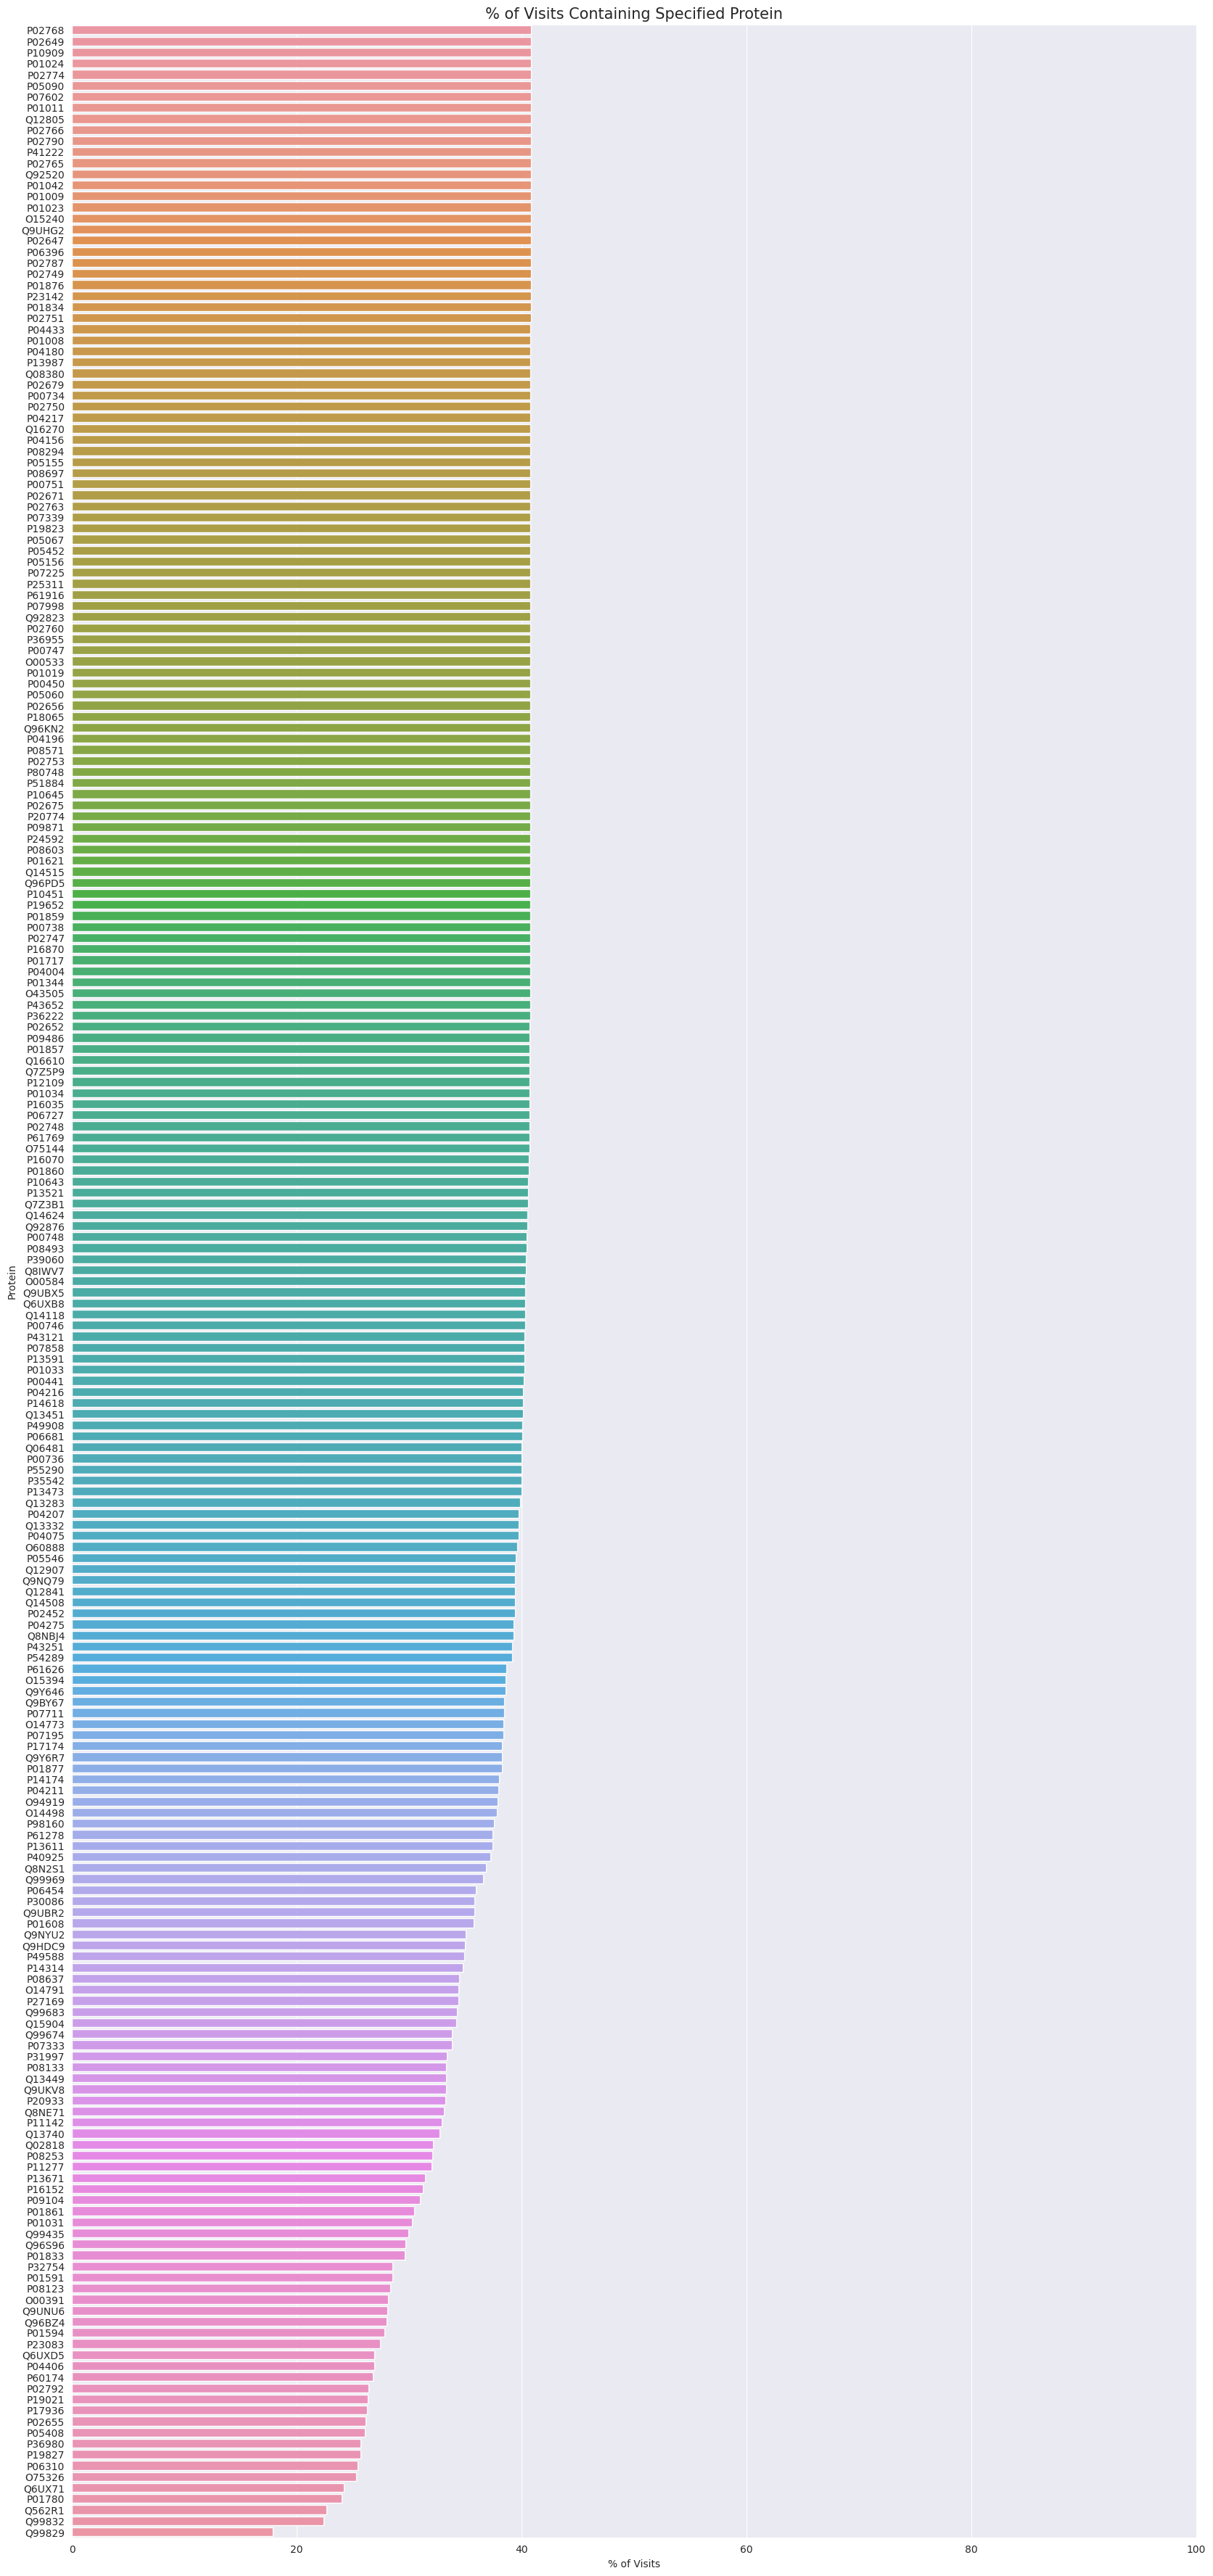

In [ ]:
plt.figure(figsize=(20, 45))
ax = sns.barplot(y=list(protein_counts.keys()), x=list(protein_counts.values()))

ax.set_title("% of Visits Containing Specified Protein", fontsize=15)
ax.set_ylabel("Protein")
ax.set_xlabel("% of Visits")
ax.set_xlim([0, 100])

plt.show()

In [ ]:
protein_month_counts = {protein: {month: 0 for month in range(109)} for protein in proteins}


for protein in proteins:
    for month in range(109):
        count = len(train_copy[(train_copy[protein] > 0.0) & (train_copy["visit_month"] == month)][protein])
        protein_month_counts[protein][month] = count

In [ ]:
protein_month_counts

{'P04433': {0: 194,
  1: 0,
  2: 0,
  3: 1,
  4: 0,
  5: 0,
  6: 85,
  7: 0,
  8: 0,
  9: 0,
  10: 0,
  11: 0,
  12: 180,
  13: 0,
  14: 0,
  15: 0,
  16: 0,
  17: 0,
  18: 8,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 173,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 1,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 146,
  37: 0,
  38: 0,
  39: 0,
  40: 0,
  41: 0,
  42: 0,
  43: 0,
  44: 0,
  45: 0,
  46: 0,
  47: 0,
  48: 137,
  49: 0,
  50: 0,
  51: 0,
  52: 0,
  53: 0,
  54: 2,
  55: 0,
  56: 0,
  57: 0,
  58: 0,
  59: 0,
  60: 84,
  61: 0,
  62: 0,
  63: 0,
  64: 0,
  65: 0,
  66: 0,
  67: 0,
  68: 0,
  69: 0,
  70: 0,
  71: 0,
  72: 21,
  73: 0,
  74: 0,
  75: 0,
  76: 0,
  77: 0,
  78: 0,
  79: 0,
  80: 0,
  81: 0,
  82: 0,
  83: 0,
  84: 30,
  85: 0,
  86: 0,
  87: 0,
  88: 0,
  89: 0,
  90: 0,
  91: 0,
  92: 0,
  93: 0,
  94: 0,
  95: 0,
  96: 2,
  97: 0,
  98: 0,
  99: 0,
  100: 0,
  101: 0,
  102: 0,
  103: 0,
  104: 0,
  105: 0,
  106: 0,
  107: 0,
  108:

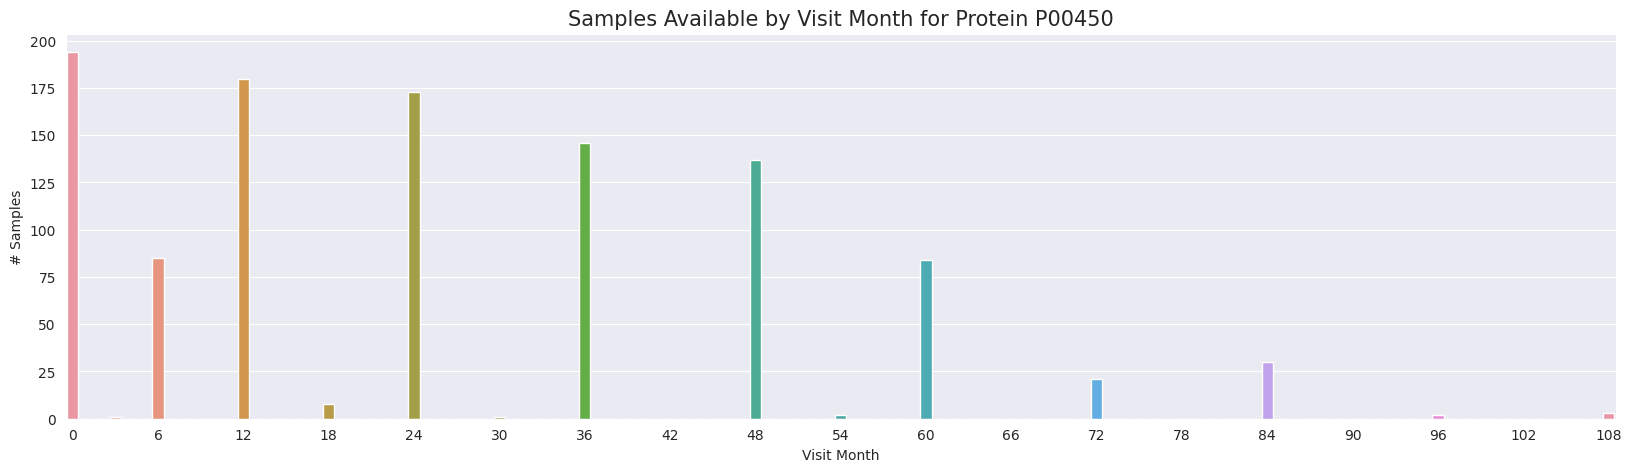

In [ ]:
from matplotlib.ticker import MultipleLocator

protein_id = "P00450"


plt.figure(figsize=(20, 5))
ax = sns.barplot(x=list(protein_month_counts[protein_id].keys()), y=list(protein_month_counts[protein_id].values()))


ax.set_title(f"Samples Available by Visit Month for Protein {protein_id}", fontsize=15)
ax.set_ylabel("# Samples")
ax.set_xlabel("Visit Month")


ax.xaxis.set_major_locator(MultipleLocator(6))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(3))

plt.show()

In [ ]:
train_copy.fillna(0, inplace=True)

train_copy["missing_all"] = train_copy[proteins].apply(lambda x: int(sum(x) == 0), axis=1)

missing_month_counts = [train_copy[train_copy["visit_month"] == x]["missing_all"].mean() * 100 for x in range(109)]
missing_month_labels = list(range(109))

<ipython-input-150-1b5764852ed8>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_copy["missing_all"] = train_copy[proteins].apply(lambda x: int(sum(x) == 0), axis=1)


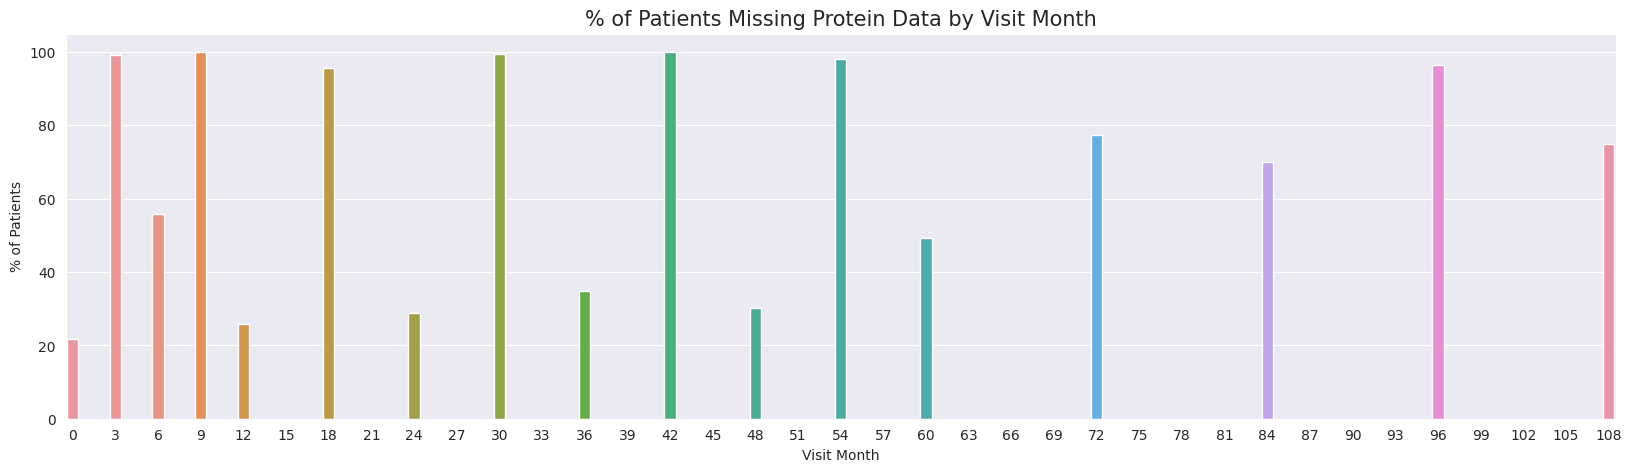

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_month_labels, y=missing_month_counts)


ax.set_title("% of Patients Missing Protein Data by Visit Month", fontsize=15)
ax.set_ylabel("% of Patients")
ax.set_xlabel("Visit Month")


ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_major_formatter('{x:.0f}')
ax.xaxis.set_minor_locator(MultipleLocator(3))

plt.show()

In [ ]:
proteins = ["P00450", "P07333", "P10451", "P01033", "P01008", "P02647", "P01024", "Q92876"]
peptides = ["GAYPLSIEPIGVR", "EPGLC(UniMod_4)TWQSLR", "WQEEMELYR", "QPSSAFAAFVK", "GLVSWGNIPC(UniMod_4)GSK"]


protein_dict = {protein: {} for protein in proteins}
peptide_dict = {peptide: {} for peptide in peptides}


for index, row in df1.iterrows():
    protein = row["UniProt"]
    if protein in protein_dict:
        protein_dict[protein][row["visit_id"]] = row["NPX"]

In [ ]:
for index, row in df2.iterrows():
    peptide = row["Peptide"]
    if peptide in peptide_dict:
        peptide_dict[peptide][row["visit_id"]] = row["PeptideAbundance"]

In [ ]:
train_copy = df4.copy()
for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].map(lambda visit_id: protein_dict[protein].get(visit_id, 0))

for peptide in peptides:
    train_copy[peptide] = train_copy["visit_id"].map(lambda visit_id: peptide_dict[peptide].get(visit_id, 0))

In [ ]:
features = proteins + peptides

train_copy[features] = train_copy[features].replace(0.0, np.nan)

features += ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

correlation_matrix = train_copy[features].corr(method="spearman")

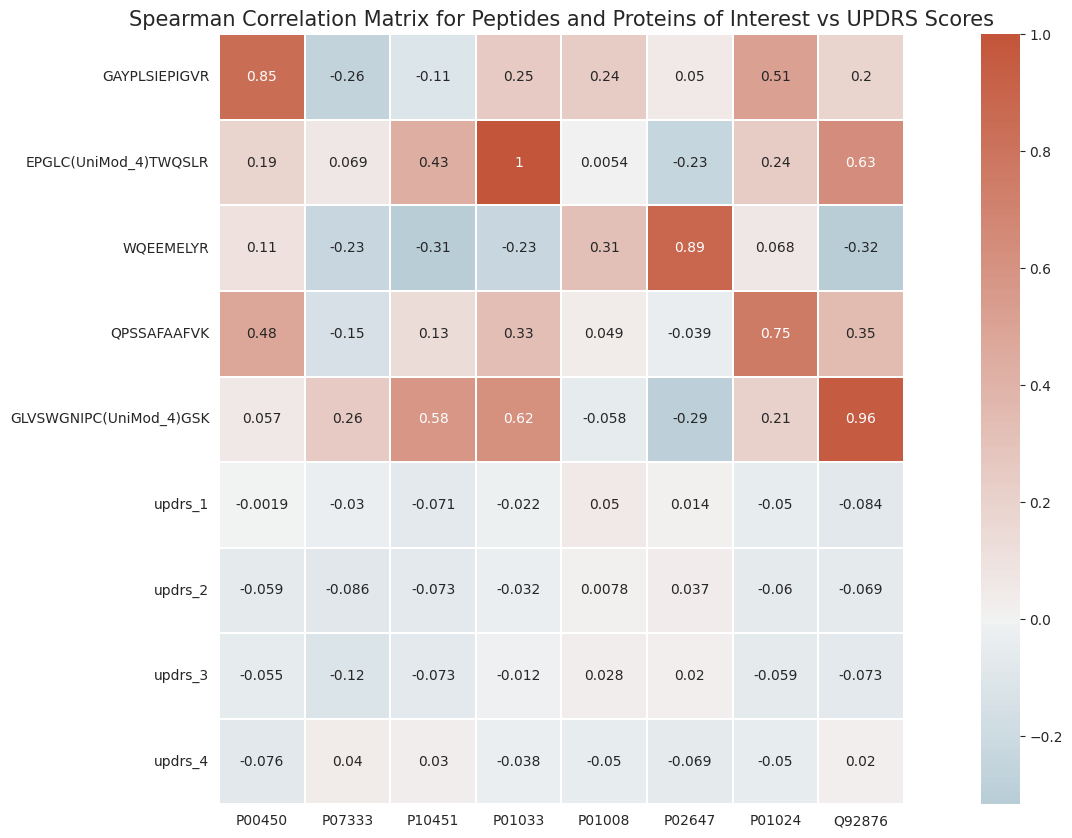

In [ ]:
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    correlation_matrix.iloc[len(proteins):, :len(proteins)],
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    center=0,
    square=True,
    linewidths=0.1,
    cbar=True,
    annot=True,
)

ax.set_title("Spearman Correlation Matrix for Peptides and Proteins of Interest vs UPDRS Scores", fontsize=15)

plt.show()

In [ ]:
train_dict = {}

for _, row in df4.iterrows():
    patient_id = row["patient_id"]
    visit_month = row["visit_month"]
    if patient_id not in train_dict:
        train_dict[patient_id] = {}
    train_dict[patient_id][visit_month] = {
        "updrs_1": row["updrs_1"],
        "updrs_2": row["updrs_2"],
        "updrs_3": row["updrs_3"],
        "updrs_4": row["updrs_4"],
    }

In [ ]:
new_data = []


month_offsets = [6, 12, 24]

for _, row in df4.iterrows():
    visit_month = row["visit_month"]
    patient_id = row["patient_id"]


    for month_offset in month_offsets:
        new_visit_month = visit_month + month_offset
        if new_visit_month in train_dict[patient_id]:
            new_row = {
                "visit_id": row["visit_id"],
                "visit_month": visit_month,
                "month_offset": month_offset,
                "patient_id": patient_id,
                "updrs_1": train_dict[patient_id][new_visit_month]["updrs_1"],
                "updrs_2": train_dict[patient_id][new_visit_month]["updrs_2"],
                "updrs_3": train_dict[patient_id][new_visit_month]["updrs_3"],
                "updrs_4": train_dict[patient_id][new_visit_month]["updrs_4"],
                "upd23b_clinical_state_on_medication": row["upd23b_clinical_state_on_medication"],
            }
            new_data.append(new_row)

In [ ]:
train = pd.DataFrame(new_data)
train_1 = train.copy()
train = pd.concat([df4, train], ignore_index=True)
train_2 = train.copy()

In [ ]:
train

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      NaN   
1         55_3          55            3     10.0      7.0     25.0      NaN   
2         55_6          55            6      8.0     10.0     34.0      NaN   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
7646  65043_48       65043           48      3.0      9.0     14.0      1.0   
7647  65043_54       65043           54      6.0      6.0     16.0      1.0   
7648  65043_60       65043           60      3.0      9.0     14.0      1.0   
7649  65043_60       65043           60      7.0      9.0     20.0      3.0   
7650  65043_72       65043           72      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  null_count         origin  \
0                                    NaN         2.0  Clinical Data   
1                                    NaN         2.0  Clinical Data   
2                                    NaN         2.0  Clinical Data   
3                                     On         0.0  Clinical Data   
4                                     On         0.0  Clinical Data   
...                                  ...         ...            ...   
7646                                 Off         NaN            NaN   
7647                                 Off         NaN            NaN   
7648                                 Off         NaN            NaN   
7649                                 Off         NaN            NaN   
7650                                 Off         NaN            NaN   

      updrs_sum  month_offset  
0          31.0           NaN  
1          42.0           NaN  
2          52.0           NaN  
3          47.0           NaN  
4          61.0           NaN  
...         ...           ...  
7646        NaN          24.0  
7647        NaN           6.0  
7648        NaN          12.0  
7649        NaN          24.0  
7650        NaN          12.0  

[7651 rows x 12 columns]

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor


def smape(y_true, y_pred):
    denominator = (y_true + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)


In [ ]:
# train['month_offset'].fillna(train['month_offset'].median(),inplace=True)

In [ ]:
train['month_offset'].isnull().sum()

2615

In [ ]:
features = ['visit_month', 'month_offset']


updrs_columns = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]


train[updrs_columns] = train[updrs_columns].fillna(0)
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_of_pred = np.zeros((train.shape[0], 4))
smape_scores = []

In [ ]:
for fold, (train_1, test) in enumerate(skf.split(train)):
    print(f"-------> Fold {fold + 1} <--------")
    x_train, x_valid = train.iloc[train_1], train.iloc[test]
    y_train, y_valid = x_train[updrs_columns], x_valid[updrs_columns]

    x_train_features, x_valid_features = x_train[features], x_valid[features]

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,
    )
    model.fit(
        x_train_features,
        y_train,
        eval_set=[(x_valid_features, y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    of_pred = model.predict(x_valid_features)
    train_of_pred[test] = np.rint(of_pred)

    local_smape = smape(y_valid.values.flatten(), np.rint(of_pred).flatten())
    smape_scores.append(local_smape)
    print(f": SMAPE = {local_smape}")

smape_baseline = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(f": SMAPE = {smape_baseline}")
print('============================================================================')
# print(x_train)
# print('============================================================================')
# print(x_valid)
# print('============================================================================')
print(y_train)
print('============================================================================')
print(y_valid)
print('============================================================================')
print(x_train_features)
print('============================================================================')
print(x_valid_features)
print('============================================================================')
# print(x_train.isna().sum())
# print('============================================================================')
# print(x_valid.isna().sum())
print('============================================================================')
print(y_train.isna().sum())
print('============================================================================')
print(y_valid.isna().sum())
print('============================================================================')
print(x_train_features.isna().sum())
print('============================================================================')
print(x_valid_features.isna().sum())
print('============================================================================')

-------> Fold 1 <--------


<ipython-input-162-2a22d46a4b72>:6: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 96.11611611122025
-------> Fold 2 <--------


<ipython-input-162-2a22d46a4b72>:6: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 96.34695243844213
-------> Fold 3 <--------


<ipython-input-162-2a22d46a4b72>:6: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 94.33612317014418
-------> Fold 4 <--------


<ipython-input-162-2a22d46a4b72>:6: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 96.33976908339322
-------> Fold 5 <--------
: SMAPE = 95.67132206485908
--> Overall results for out of fold predictions
: SMAPE = 95.76205657361177
      updrs_1  updrs_2  updrs_3  updrs_4
0        10.0      6.0     15.0      0.0
5         7.0     13.0     38.0      0.0
6        16.0      9.0     49.0      0.0
7        14.0     13.0     49.0      0.0
8        17.0     18.0     51.0      0.0
...       ...      ...      ...      ...
7645      6.0      6.0     16.0      1.0
7646      3.0      9.0     14.0      1.0
7648      3.0      9.0     14.0      1.0
7649      7.0      9.0     20.0      3.0
7650      7.0      9.0     20.0      3.0

[6121 rows x 4 columns]
      updrs_1  updrs_2  updrs_3  updrs_4
1        10.0      7.0     25.0      0.0
2         8.0     10.0     34.0      0.0
3         8.0      9.0     30.0      0.0
4        10.0     10.0     41.0      0.0
22        2.0      6.0     35.0      0.0
...       ...      ...      ...      ...
7620      3.0      6.0     19.0      0

<ipython-input-162-2a22d46a4b72>:6: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


In [ ]:
data_point = [48, 24.0]


of_pred = model.predict(data_point)

print(of_pred)

[ 7.94312063  8.33145283 24.43440519  1.90507125]


In [ ]:
y_train

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
ax.set_title("SMAPE per Fold", fontsize=15)
ax.set_ylabel("SMAPE")
ax.set_xlabel("Fold #")

plt.show()

In [ ]:
def smape(y_true, y_pred):
    denominator = (y_true + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)


In [ ]:
features = ['visit_month', 'month_offset']

train_copy = train.copy()
train_copy[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] = train_copy[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].fillna(0)

n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []


In [ ]:
for fold, (train_index, test_index) in enumerate(skf.split(train_copy)):
    print(f"-------> Fold {fold + 1} <--------")
    x_train, x_valid = train_copy.iloc[train_index], train_copy.iloc[test_index]
    y_train, y_valid = x_train[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']], x_valid[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

    x_train_features, x_valid_features = x_train[features], x_valid[features]

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,
    )
    model.fit(
        x_train_features,
        y_train,
        eval_set=[(x_valid_features, y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features)
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)

    local_smape = smape(y_valid.to_numpy().flatten(), np.rint(oof_preds).flatten())
    smape_scores.append(local_smape)
    print(f": SMAPE = {local_smape}")

smape_updrs40 = np.mean(smape_scores)
print("--> Overall results for out-of-fold predictions")
print(f": SMAPE = {smape_updrs40}")


-------> Fold 1 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 68.50335901201638
-------> Fold 2 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 71.22212065098059
-------> Fold 3 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 67.63800513840444
-------> Fold 4 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 69.4229766507415
-------> Fold 5 <--------
: SMAPE = 70.80235309756256
--> Overall results for out-of-fold predictions
: SMAPE = 69.5177629099411


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


In [ ]:
data_point = [48, 12.0]

# Now, you can use this data_point to make predictions
of_pred = model.predict(data_point)

print(of_pred)

[ 7.76955268  7.53299102 22.21348475  1.68523323]


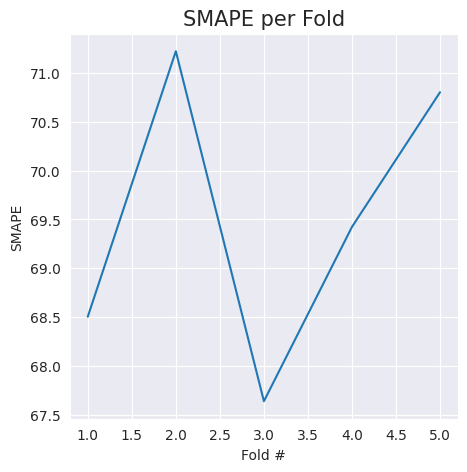

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
ax.set_title("SMAPE per Fold", fontsize=15)
ax.set_ylabel("SMAPE")
ax.set_xlabel("Fold #")

plt.show()


In [ ]:
supplemental_dict = {}


smape_scores = []


month_offsets = [6, 12, 24]


for _, row in df3.iterrows():
    patient_id, visit_month = row["patient_id"], row["visit_month"]
    supplemental_dict.setdefault(patient_id, {})[visit_month] = {
        "updrs_1": row["updrs_1"],
        "updrs_2": row["updrs_2"],
        "updrs_3": row["updrs_3"],
        "updrs_4": row["updrs_4"],
    }

In [ ]:
additional_data = []

for _, row in df3.iterrows():
    visit_id, patient_id, visit_month = row["visit_id"], row["patient_id"], row["visit_month"]
    for month_offset in month_offsets:
        new_visit_month = visit_month + month_offset
        if new_visit_month in supplemental_dict[patient_id]:
            new_row = {
                "visit_id": visit_id,
                "visit_month": visit_month,
                "month_offset": month_offset,
                "patient_id": patient_id,
                **supplemental_dict[patient_id][new_visit_month],
                "upd23b_clinical_state_on_medication": row["upd23b_clinical_state_on_medication"],
            }
            additional_data.append(new_row)




In [ ]:
additional = pd.DataFrame(additional_data)

additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)


n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)


train_oof_preds = np.zeros((train.shape[0], 4))


for fold, (train_index, test_index) in enumerate(skf.split(train, train[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = train.iloc[train_index], train.iloc[test_index]
    y_train, y_valid = train[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]

    x_train = pd.concat([x_train, additional]).reset_index(drop=True)
    y_train = y_train.append(additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])


    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,
    )
    model.fit(
        x_train[features],
        y_train,
        eval_set=[(x_valid[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )


    oof_preds = model.predict(x_valid[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)


    local_smape = smape(y_valid.to_numpy().flatten(), np.rint(oof_preds).flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))


-------> Fold 1 <--------


<ipython-input-183-6019546aad0f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])
<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator
<ipython-input-183-6019546aad0f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])


: SMAPE = 68.46803001989615
-------> Fold 2 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator
<ipython-input-183-6019546aad0f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])


: SMAPE = 71.02491068510537
-------> Fold 3 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator
<ipython-input-183-6019546aad0f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])


: SMAPE = 67.54875956755066
-------> Fold 4 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator
<ipython-input-183-6019546aad0f>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(additional[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])


: SMAPE = 69.2422365859138
-------> Fold 5 <--------
: SMAPE = 70.86352592373821


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


In [ ]:
data_point = [48, 12.0]

# Now, you can use this data_point to make predictions
of_pred = model.predict(data_point)

print(of_pred)

[ 7.45251958  7.01958909 21.14270778  1.60241153]


In [ ]:
smape_additional = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_additional))

--> Overall results for out of fold predictions
: SMAPE = 69.42949255644083


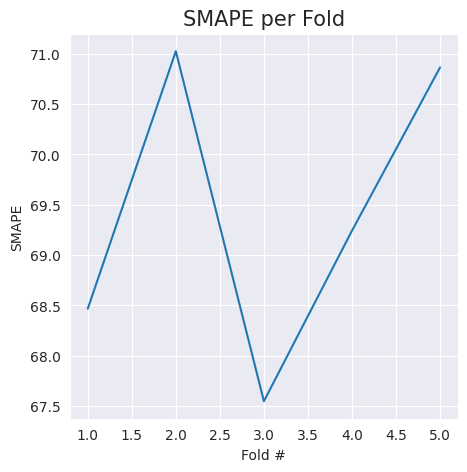

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

In [ ]:
features = ['visit_month', 'month_offset', 'med_state']

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)


train_copy["med_state"] = train_copy["upd23b_clinical_state_on_medication"].map({"On": 1, "Off": 0}).fillna(2)

In [ ]:
n_folds = 5
skf = KFold(n_splits=n_folds, random_state=2023, shuffle=True)


train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []


for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = train_copy.iloc[train_index], train_copy.iloc[test_index]
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]


    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,
    )
    model.fit(
        x_train[features],
        y_train,
        eval_set=[(x_valid[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )


    oof_preds = model.predict(x_valid[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)


    local_smape = smape(y_valid.to_numpy().flatten(), np.rint(oof_preds).flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))

-------> Fold 1 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 66.72134389267916
-------> Fold 2 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 68.91129491867824
-------> Fold 3 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 65.62388386161908
-------> Fold 4 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 67.29632811108861
-------> Fold 5 <--------
: SMAPE = 69.53920784321745


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


In [ ]:
train_copy

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      0.0   
1         55_3          55            3     10.0      7.0     25.0      0.0   
2         55_6          55            6      8.0     10.0     34.0      0.0   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
7646  65043_48       65043           48      3.0      9.0     14.0      1.0   
7647  65043_54       65043           54      6.0      6.0     16.0      1.0   
7648  65043_60       65043           60      3.0      9.0     14.0      1.0   
7649  65043_60       65043           60      7.0      9.0     20.0      3.0   
7650  65043_72       65043           72      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  null_count         origin  \
0                                    NaN         2.0  Clinical Data   
1                                    NaN         2.0  Clinical Data   
2                                    NaN         2.0  Clinical Data   
3                                     On         0.0  Clinical Data   
4                                     On         0.0  Clinical Data   
...                                  ...         ...            ...   
7646                                 Off         NaN            NaN   
7647                                 Off         NaN            NaN   
7648                                 Off         NaN            NaN   
7649                                 Off         NaN            NaN   
7650                                 Off         NaN            NaN   

      updrs_sum  month_offset  med_state  
0          31.0           NaN        2.0  
1          42.0           NaN        2.0  
2          52.0           NaN        2.0  
3          47.0           NaN        1.0  
4          61.0           NaN        1.0  
...         ...           ...        ...  
7646        NaN          24.0        0.0  
7647        NaN           6.0        0.0  
7648        NaN          12.0        0.0  
7649        NaN          24.0        0.0  
7650        NaN          12.0        0.0  

[7651 rows x 13 columns]

In [ ]:


data_point = [0,12.0,2.0]

# Now, you can use this data_point to make predictions
of_pred = model.predict(data_point)

print(of_pred)

[ 5.33831319  4.74417085 14.76306137  0.18136536]


In [ ]:
smape_med = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_med))

--> Overall results for out of fold predictions
: SMAPE = 67.61841172545651


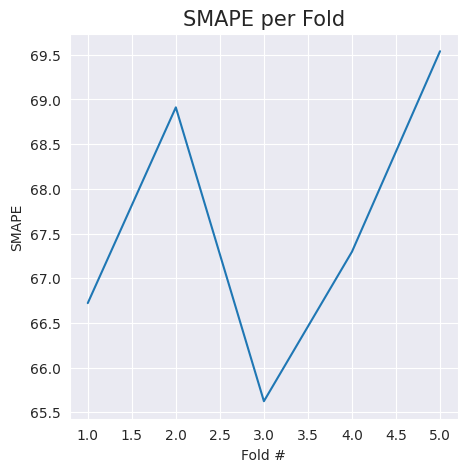

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
_ = sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
_ = ax.set_title("SMAPE per Fold", fontsize=15)
_ = ax.set_ylabel("SMAPE")
_ = ax.set_xlabel("Fold #")

In [ ]:
from sklearn.model_selection import GroupKFold

features = [
    "visit_month", "month_offset", "O00391", "O00533", "O00584", "O14498", "O14773", "O14791", "O15240",
    "O15394", "O43505", "O60888", "O75144", "O75326", "O94919", "P00441", "P00450", "P00734", "P00736",
    "P00738", "P00746", "P00747", "P00748", "P00751", "P01008", "P01009", "P01011", "P01019", "P01023",
    "P01024", "P01031", "P01033", "P01034", "P01042", "P01344", "P01591", "P01608", "P01621", "P01717",
    "P01780", "P01833", "P01834", "P01857", "P01859", "P01860", "P01861", "P01876", "P01877", "P02452",
    "P02647", "P02649", "P02652", "P02655", "P02656", "P02671", "P02675", "P02679", "P02747", "P02748",
    "P02749", "P02750", "P02751", "P02753", "P02760", "P02763", "P02765", "P02766", "P02768", "P02774",
    "P02787", "P02790", "P04004", "P04075", "P04156", "P04180", "P04196", "P04207", "P04211", "P04216",
    "P04217", "P04275", "P04406", "P04433", "P05060", "P05067", "P05090", "P05155", "P05156", "P05408",
    "P05452", "P05546", "P06310", "P06396", "P06454", "P06681", "P06727", "P07195", "P07225", "P07333",
    "P07339", "P07602", "P07711", "P07858", "P07998", "P08123", "P08133", "P08253", "P08294", "P08493",
    "P08571", "P08603", "P08637", "P08697", "P09104", "P09486", "P09871", "P10451", "P10643", "P10645",
    "P10909", "P11142", "P11277", "P12109", "P13473", "P13521", "P13591", "P13611", "P13671", "P13987",
    "P14174", "P14314", "P14618", "P16035", "P16070", "P16152", "P16870", "P17174", "P17936", "P18065",
    "P19021", "P19652", "P19823", "P19827", "P20774", "P20933", "P23083", "P23142", "P24592", "P25311",
    "P27169", "P30086", "P31997", "P35542", "P36222", "P36955", "P36980", "P39060", "P40925", "P41222",
    "P43121", "P43251", "P43652", "P49588", "P49908", "P51884", "P54289", "P55290", "P61278", "P61626",
    "P61769", "P61916", "P80748", "P98160", "Q02818", "Q06481", "Q08380", "Q12805", "Q12841", "Q12907",
    "Q13283", "Q13332", "Q13451", "Q13740", "Q14118", "Q14508", "Q14515", "Q14624", "Q15904", "Q16270",
    "Q16610", "Q562R1", "Q6UX71", "Q6UXB8", "Q6UXD5", "Q7Z3B1", "Q7Z5P9", "Q8IWV7", "Q8N2S1", "Q8NBJ4",
    "Q8NE71", "Q92520", "Q92823", "Q92876", "Q96BZ4", "Q96KN2", "Q96PD5", "Q96S96", "Q99435", "Q99674",
    "Q99832", "Q99969", "Q9BY67", "Q9HDC9", "Q9NQ79", "Q9NYU2", "Q9UBR2", "Q9UBX5", "Q9UHG2", "Q9UNU6",
    "Q9Y646", "Q9Y6R7", "P01594", "P02792", "P32754", "P60174", "Q13449", "Q99683", "Q99829", "Q9UKV8"
]

train_copy = train.copy()
train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]] = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].fillna(0)

proteins = df1["UniProt"].unique()


In [ ]:
protein_visit_dict = {}
for protein in proteins:
    if protein not in protein_visit_dict:
        protein_visit_dict[protein] = {}
    for index, row in df1[(df1["UniProt"] == protein)].iterrows():
        visit_id = row["visit_id"]
        protein_visit_dict[protein][visit_id] = row["NPX"]

for protein in proteins:
    train_copy[protein] = train_copy["visit_id"].apply(
           lambda visit_id: protein_visit_dict[protein][visit_id] if visit_id in protein_visit_dict[protein] else 0
    )


<ipython-input-194-04460504c00f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_copy[protein] = train_copy["visit_id"].apply(
<ipython-input-194-04460504c00f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_copy[protein] = train_copy["visit_id"].apply(
<ipython-input-194-04460504c00f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

In [ ]:

n_folds = 5
skf = GroupKFold(n_splits=n_folds)
train_oof_preds = np.zeros((train.shape[0], 4))
smape_scores = []

for fold, (train_index, test_index) in enumerate(skf.split(train_copy, train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]], groups=train_copy["patient_id"])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train_copy.iloc[train_index]), pd.DataFrame(train_copy.iloc[test_index])
    y_train, y_valid = train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[train_index], train_copy[["updrs_1", "updrs_2", "updrs_3", "updrs_4"]].iloc[test_index]

    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = CatBoostRegressor(
        eval_metric="MultiRMSE",
        loss_function="MultiRMSE",
        random_state=2023,
        num_boost_round=5000,
        od_type="Iter",
        od_wait=200,
        use_best_model=True,
        verbose=0,
    )
    model.fit(
        x_train_features[features],
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        verbose=0,
        early_stopping_rounds=200,
        use_best_model=True,
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_preds[:, 3] = 0
    train_oof_preds[test_index] = np.rint(oof_preds)

    reshaped_truth = y_valid.to_numpy().reshape(-1, 1)
    new_preds = np.rint(oof_preds)
    reshaped_preds = new_preds.reshape(-1, 1)

    local_smape = smape(reshaped_truth.flatten(), reshaped_preds.flatten())
    smape_scores.append(local_smape)
    print(": SMAPE = {}".format(local_smape))



-------> Fold 1 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 71.69819753907323
-------> Fold 2 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 72.34656290610852
-------> Fold 3 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 66.53572203313085
-------> Fold 4 <--------


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


: SMAPE = 68.28687817764839
-------> Fold 5 <--------
: SMAPE = 69.70239549375675


<ipython-input-177-1ae88957a2ed>:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


In [ ]:
train_copy

visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         55_0          55            0     10.0      6.0     15.0      0.0   
1         55_3          55            3     10.0      7.0     25.0      0.0   
2         55_6          55            6      8.0     10.0     34.0      0.0   
3         55_9          55            9      8.0      9.0     30.0      0.0   
4        55_12          55           12     10.0     10.0     41.0      0.0   
...        ...         ...          ...      ...      ...      ...      ...   
7646  65043_48       65043           48      3.0      9.0     14.0      1.0   
7647  65043_54       65043           54      6.0      6.0     16.0      1.0   
7648  65043_60       65043           60      3.0      9.0     14.0      1.0   
7649  65043_60       65043           60      7.0      9.0     20.0      3.0   
7650  65043_72       65043           72      7.0      9.0     20.0      3.0   

     upd23b_clinical_state_on_medication  null_count         origin  ...  \
0                                    NaN         2.0  Clinical Data  ...   
1                                    NaN         2.0  Clinical Data  ...   
2                                    NaN         2.0  Clinical Data  ...   
3                                     On         0.0  Clinical Data  ...   
4                                     On         0.0  Clinical Data  ...   
...                                  ...         ...            ...  ...   
7646                                 Off         NaN            NaN  ...   
7647                                 Off         NaN            NaN  ...   
7648                                 Off         NaN            NaN  ...   
7649                                 Off         NaN            NaN  ...   
7650                                 Off         NaN            NaN  ...   

       Q9Y646   Q9Y6R7   P01594   P02792   P32754   P60174   Q13449    Q99683  \
0     23833.7  18953.5     0.00      0.0      0.0      0.0      0.0       0.0   
1         0.0      0.0     0.00      0.0      0.0      0.0      0.0       0.0   
2     17722.5  16642.7     0.00  21473.1      0.0      0.0  49927.5  121417.0   
3         0.0      0.0     0.00      0.0      0.0      0.0      0.0       0.0   
4     28536.1  19290.9     0.00      0.0      0.0  20088.2  45519.2  121322.0   
...       ...      ...      ...      ...      ...      ...      ...       ...   
7646  20198.8  39535.0  7098.44      0.0  57323.9      0.0      0.0   96827.3   
7647      0.0      0.0     0.00      0.0      0.0      0.0      0.0       0.0   
7648      0.0      0.0     0.00      0.0      0.0      0.0      0.0       0.0   
7649      0.0      0.0     0.00      0.0      0.0      0.0      0.0       0.0   
7650      0.0      0.0     0.00      0.0      0.0      0.0      0.0       0.0   

       Q99829   Q9UKV8  
0         0.0      0.0  
1         0.0      0.0  
2         0.0      0.0  
3         0.0      0.0  
4     25589.4  65762.6  
...       ...      ...  
7646  14019.1  39046.7  
7647      0.0      0.0  
7648      0.0      0.0  
7649      0.0      0.0  
7650      0.0      0.0  

[7651 rows x 239 columns]

In [ ]:
smape_protein = np.mean(smape_scores)
print("--> Overall results for out of fold predictions")
print(": SMAPE = {}".format(smape_protein))

--> Overall results for out of fold predictions
: SMAPE = 69.71395122994355


Text(0.5, 0, 'Fold #')

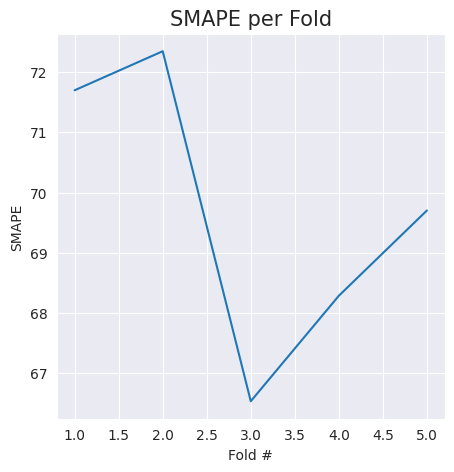

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

data = pd.DataFrame({"Fold": [x + 1 for x in range(n_folds)], "SMAPE": smape_scores})
sns.lineplot(x="Fold", y="SMAPE", data=data, ax=ax)
ax.set_title("SMAPE per Fold", fontsize=15)
ax.set_ylabel("SMAPE")
ax.set_xlabel("Fold #")

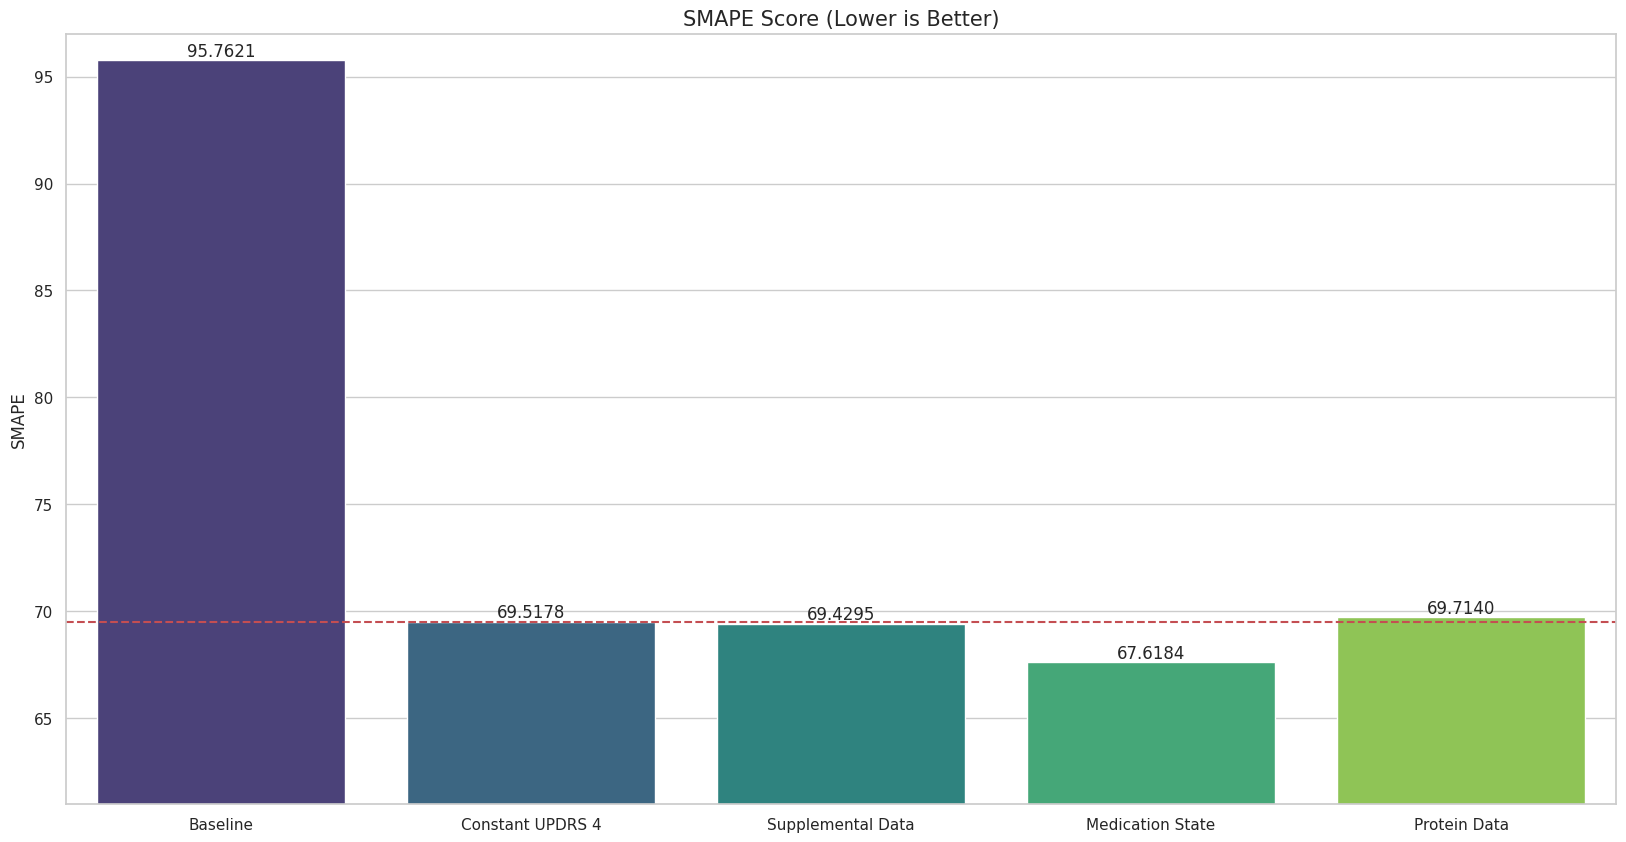

In [ ]:

smape_scores = [
    smape_baseline,
    smape_updrs40,
    smape_additional,
    smape_med,
    smape_protein,
]
labels = ["Baseline", "Constant UPDRS 4", "Supplemental Data", "Medication State", "Protein Data"]


plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=smape_scores, palette="viridis")


ax.axhline(y=69.51, color='r', linestyle='--')


ax.set_title("SMAPE Score (Lower is Better)", fontsize=15)
ax.set_xlabel("")
ax.set_ylabel("SMAPE")
ax.set_ylim([61, 97])


for p, label in zip(ax.patches, smape_scores):
    height = p.get_height()
    ax.annotate(f"{height:.4f}", (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)


plt.show()
